In [1]:
#v2b0
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print(device_lib.list_local_devices())
print(tf.__version__)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)

image_size = (224, 224)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
IMG_SIZE=224
NUM_CLASSES=2

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetV2B0(include_top=False,weights="imagenet",input_tensor=x,include_preprocessing=True)
    model.trainable = False
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  
    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6367604537448214154
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 803486010343606733
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                  

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 192)  768        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 192)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 48)   9216        ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_p

                                                                                                  
 block4b_add (Add)              (None, 14, 14, 96)   0           ['block4b_project_bn[0][0]',     
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 14, 14, 384)  36864       ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 14, 14, 384)  1536       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 14, 14, 384)  0          ['block4c_expand_bn[0][0]']      
 ivation) 

 block5b_dwconv2 (DepthwiseConv  (None, 14, 14, 672)  6048       ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 14, 14, 672)  2688       ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 14, 14, 672)  0          ['block5b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5b_se_squeeze (GlobalAver  (None, 672)         0           ['block5b_activation[0][0]']     
 agePoolin

 block5d_se_squeeze (GlobalAver  (None, 672)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5d_se_squeeze[0][0]']     
                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5d_se_reduce[0][0]']      
                                                                                                  
 block5d_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5d_activation[0][0]',     
          

 block6a_se_excite (Multiply)   (None, 7, 7, 672)    0           ['block6a_activation[0][0]',     
                                                                  'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_project_conv (Conv2D)  (None, 7, 7, 192)    129024      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6a_project_bn[0][0]']     
                                                                                                  
 block6b_e

                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6d_expand_activation (Act  (None, 7, 7, 1152)  0           ['block6d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6d_dwconv2 (DepthwiseConv  (None, 7, 7, 1152)  10368       ['block6d_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6d_b

                                                                                                  
 block6f_bn (BatchNormalization  (None, 7, 7, 1152)  4608        ['block6f_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6f_activation (Activation  (None, 7, 7, 1152)  0           ['block6f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6f_se_squeeze (GlobalAver  (None, 1152)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_s

                                                                                                  
 block6h_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6h_se_squeeze[0][0]']     
                                                                                                  
 block6h_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block6h_se_reshape[0][0]']     
                                                                                                  
 block6h_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6h_se_reduce[0][0]']      
                                                                                                  
 block6h_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block6h_activation[0][0]',     
                                                                  'block6h_se_expand[0][0]']      
                                                                                                  
 block6h_p

In [2]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']   

                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 48)   9216        ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 48)  192         ['block3b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3b_add (Add)              (None, 28, 28, 48)   0           ['block3b_project_bn[0][0]',     
                                                                  'block3a_project_bn[0][0]']     
                                                                                                  
 block4a_e

 block4c_expand_bn (BatchNormal  (None, 14, 14, 384)  1536       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 14, 14, 384)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_dwconv2 (DepthwiseConv  (None, 14, 14, 384)  3456       ['block4c_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4c_bn (BatchNormalization  (None, 14, 14, 384)  1536       ['block4c_dwconv2[0][0]']        
 )        

 block5b_activation (Activation  (None, 14, 14, 672)  0          ['block5b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5b_se_squeeze (GlobalAver  (None, 672)         0           ['block5b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5b_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5b_se_squeeze[0][0]']     
                                                                                                  
 block5b_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block5b_se_reshape[0][0]']     
                                                                                                  
 block5b_s

                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5d_se_reduce[0][0]']      
                                                                                                  
 block5d_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5d_activation[0][0]',     
                                                                  'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5d_project_conv[0][0]']   
 lization)                                                                                        
          

 lization)                                                                                        
                                                                                                  
 block6b_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6a_project_bn[0][0]']     
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6b_expand_activation (Act  (None, 7, 7, 1152)  0           ['block6b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6b_d

                                                                                                  
 block6d_dwconv2 (DepthwiseConv  (None, 7, 7, 1152)  10368       ['block6d_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 7, 7, 1152)  4608        ['block6d_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 7, 7, 1152)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_s

                                                                                                  
 block6f_se_squeeze (GlobalAver  (None, 1152)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6f_se_squeeze[0][0]']     
                                                                                                  
 block6f_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block6f_se_reshape[0][0]']     
                                                                                                  
 block6f_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_s

                                                                                                  
 block6h_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block6h_activation[0][0]',     
                                                                  'block6h_se_expand[0][0]']      
                                                                                                  
 block6h_project_conv (Conv2D)  (None, 7, 7, 192)    221184      ['block6h_se_excite[0][0]']      
                                                                                                  
 block6h_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6h_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6h_add (Add)              (None, 7, 7, 192)    0           ['block6h_project_bn[0][0]',     
          

In [3]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b0best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 66s 240ms/step - loss: 0.2891 - accuracy: 0.8851 - val_loss: 0.1506 - val_accuracy: 0.9450
Epoch 2/40
174/174 [==============================] - 33s 187ms/step - loss: 0.1614 - accuracy: 0.9381 - val_loss: 0.1356 - val_accuracy: 0.9501
Epoch 3/40
174/174 [==============================] - 34s 194ms/step - loss: 0.1107 - accuracy: 0.9564 - val_loss: 0.0989 - val_accuracy: 0.9645
Epoch 4/40
174/174 [==============================] - 34s 191ms/step - loss: 0.0967 - accuracy: 0.9657 - val_loss: 0.1580 - val_accuracy: 0.9349
Epoch 5/40
174/174 [==============================] - 36s 207ms/step - loss: 0.0825 - accuracy: 0.9688 - val_loss: 0.0745 - val_accuracy: 0.9712
Epoch 6/40
174/174 [==============================] - 33s 189ms/step - loss: 0.0618 - accuracy: 0.9791 - val_loss: 0.1334 - val_accuracy: 0.9543
Epoch 7/40
174/174 [==============================] - 34s 193ms/step - loss: 0.0677 - accuracy: 0.9773 - val_loss: 0.0653 - val_ac

{'loss': [0.28907719254493713, 0.1613519936800003, 0.11069255322217941, 0.09671782702207565, 0.08252910524606705, 0.061810996383428574, 0.06766409426927567, 0.04907726123929024, 0.04679805412888527, 0.04051561653614044, 0.041470978409051895, 0.051388561725616455, 0.045350149273872375, 0.026032721623778343, 0.034838635474443436, 0.03341817483305931, 0.031031079590320587, 0.024739496409893036, 0.012492460198700428, 0.036294806748628616, 0.02374231442809105, 0.014509479515254498, 0.018699727952480316, 0.014864152297377586, 0.020207049325108528, 0.032619357109069824, 0.01784745790064335, 0.01885511539876461, 0.019373593851923943, 0.02443488873541355, 0.026569679379463196, 0.00570566626265645, 0.01692878268659115, 0.011904889717698097, 0.027286402881145477, 0.010506381280720234, 0.023140838369727135, 0.01105504296720028, 0.008603094145655632, 0.009309199638664722], 'accuracy': [0.8851217031478882, 0.9381424784660339, 0.9563570618629456, 0.9657348990440369, 0.9688007235527039, 0.979080259799

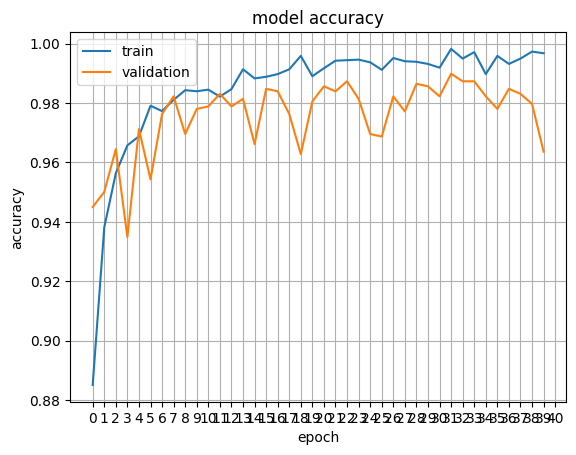

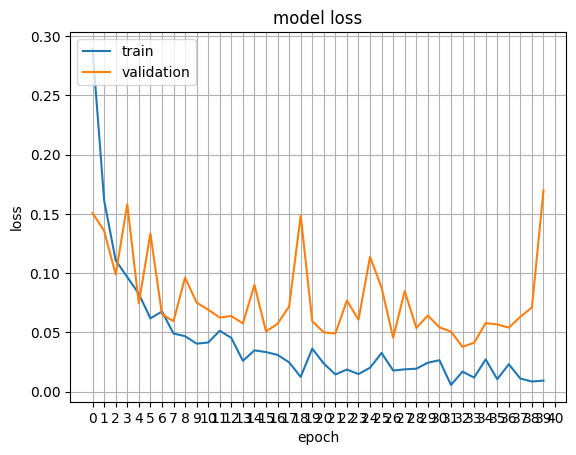

37/37 [==============================] - 3s 56ms/step - loss: 0.0506 - accuracy: 0.9898


In [4]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
import tensorflow_addons as tfa

from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b0best.h5')
a=model1.evaluate(
    x=test_ds
)
a=model1.evaluate (
    x=val_ds
)

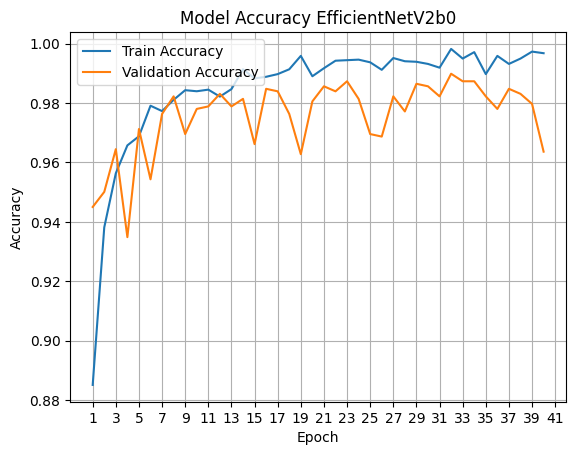

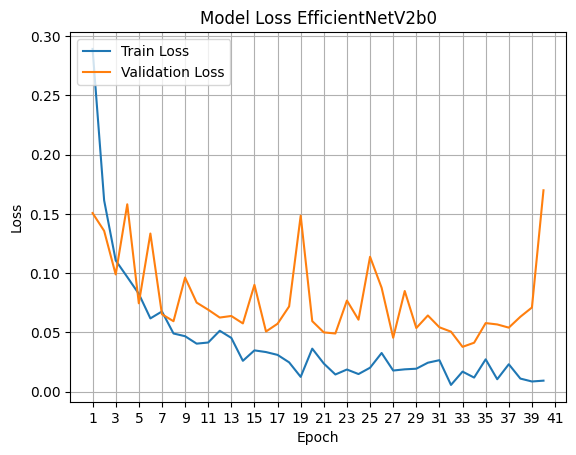

In [1]:
hist={'loss': [0.28907719254493713, 0.1613519936800003, 0.11069255322217941, 0.09671782702207565, 0.08252910524606705, 0.061810996383428574, 0.06766409426927567, 0.04907726123929024, 0.04679805412888527, 0.04051561653614044, 0.041470978409051895, 0.051388561725616455, 0.045350149273872375, 0.026032721623778343, 0.034838635474443436, 0.03341817483305931, 0.031031079590320587, 0.024739496409893036, 0.012492460198700428, 0.036294806748628616, 0.02374231442809105, 0.014509479515254498, 0.018699727952480316, 0.014864152297377586, 0.020207049325108528, 0.032619357109069824, 0.01784745790064335, 0.01885511539876461, 0.019373593851923943, 0.02443488873541355, 0.026569679379463196, 0.00570566626265645, 0.01692878268659115, 0.011904889717698097, 0.027286402881145477, 0.010506381280720234, 0.023140838369727135, 0.01105504296720028, 0.008603094145655632, 0.009309199638664722], 'accuracy': [0.8851217031478882, 0.9381424784660339, 0.9563570618629456, 0.9657348990440369, 0.9688007235527039, 0.9790802597999573, 0.9772768020629883, 0.9810640215873718, 0.9843102097511292, 0.9839494824409485, 0.9844905138015747, 0.9821460843086243, 0.984670877456665, 0.9913435578346252, 0.9882777333259583, 0.9888187646865845, 0.9897204637527466, 0.9913435578346252, 0.9958521127700806, 0.98899906873703, 0.9917042255401611, 0.9942290186882019, 0.9944093823432922, 0.9945897459983826, 0.9936879873275757, 0.9911631941795349, 0.9951307773590088, 0.9940487146377563, 0.993868350982666, 0.9931469559669495, 0.9918845891952515, 0.9981966018676758, 0.9949504137039185, 0.9971145391464233, 0.9897204637527466, 0.9958521127700806, 0.9931469559669495, 0.9949504137039185, 0.9972948431968689, 0.9967538118362427], 'val_loss': [0.15064410865306854, 0.13562706112861633, 0.09886860847473145, 0.158033087849617, 0.07452962547540665, 0.13336904346942902, 0.06531179696321487, 0.059418171644210815, 0.0962870717048645, 0.07514212280511856, 0.06912373006343842, 0.06252393126487732, 0.06385097652673721, 0.057563040405511856, 0.09010177850723267, 0.05075293034315109, 0.05729849636554718, 0.07190898060798645, 0.14843551814556122, 0.05949348956346512, 0.05000188946723938, 0.049089401960372925, 0.07686745375394821, 0.06071736663579941, 0.11377587169408798, 0.08765267580747604, 0.04549874737858772, 0.084908127784729, 0.05369943752884865, 0.0642719641327858, 0.05429999530315399, 0.05062229931354523, 0.037818774580955505, 0.04129163920879364, 0.05785194784402847, 0.05671590566635132, 0.05402512848377228, 0.06318459659814835, 0.07097741961479187, 0.16986501216888428], 'val_accuracy': [0.9450084567070007, 0.9500846266746521, 0.9644669890403748, 0.9348561763763428, 0.9712352156639099, 0.9543147087097168, 0.9763113260269165, 0.9822335243225098, 0.9695431590080261, 0.9780033826828003, 0.9788494110107422, 0.9830795526504517, 0.9788494110107422, 0.9813874959945679, 0.9661590456962585, 0.9847715497016907, 0.9839255213737488, 0.9763113260269165, 0.962774932384491, 0.980541467666626, 0.9856175780296326, 0.9839255213737488, 0.9873096346855164, 0.9813874959945679, 0.9695431590080261, 0.9686971306800842, 0.9822335243225098, 0.9771573543548584, 0.9864636063575745, 0.9856175780296326, 0.9822335243225098, 0.989847719669342, 0.9873096346855164, 0.9873096346855164, 0.9822335243225098, 0.9780033826828003, 0.9847715497016907, 0.9830795526504517, 0.9796954393386841, 0.9636209607124329]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV2b0')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV2b0')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [5]:
#v2b1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetV2B1
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")

print(device_lib.list_local_devices())
print(tf.__version__)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)

image_size = (240, 240)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
IMG_SIZE=240
NUM_CLASSES=2

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetV2B1(include_top=False,weights="imagenet",input_tensor=x,include_preprocessing=True)

    model.trainable = False


    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)


    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()



Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15669319335252140467
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13956938758017299217
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                               

                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 60, 60, 128)  512        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 60, 60, 128)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 60, 60, 32)   4096        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_p

                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 12)     2316        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 192)    2496        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 15, 15, 192)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_p

 block4c_project_bn (BatchNorma  (None, 15, 15, 96)  384         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_add (Add)              (None, 15, 15, 96)   0           ['block4c_project_bn[0][0]',     
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 15, 15, 384)  36864       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 15, 15, 384)  1536       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
          

 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 15, 15, 672)  6048       ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 15, 15, 672)  2688       ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 15, 15, 672)  0          ['block5b_bn[0][0]']             
 )                                                                                                
          

 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 672)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5d_se_squeeze[0][0]']     
                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5d_se_reduce[0][0]']      
          

 block5f_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5f_se_reduce[0][0]']      
                                                                                                  
 block5f_se_excite (Multiply)   (None, 15, 15, 672)  0           ['block5f_activation[0][0]',     
                                                                  'block5f_se_expand[0][0]']      
                                                                                                  
 block5f_project_conv (Conv2D)  (None, 15, 15, 112)  75264       ['block5f_se_excite[0][0]']      
                                                                                                  
 block5f_project_bn (BatchNorma  (None, 15, 15, 112)  448        ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_a

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 8, 8, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 8, 8, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv2 (DepthwiseConv  (None, 8, 8, 1152)  10368       ['block6c_expand_activation[0][0]
 2D)      

 block6e_dwconv2 (DepthwiseConv  (None, 8, 8, 1152)  10368       ['block6e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6e_bn (BatchNormalization  (None, 8, 8, 1152)  4608        ['block6e_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6e_activation (Activation  (None, 8, 8, 1152)  0           ['block6e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 1152)        0           ['block6e_activation[0][0]']     
 agePoolin

 block6g_se_squeeze (GlobalAver  (None, 1152)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6g_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6g_se_squeeze[0][0]']     
                                                                                                  
 block6g_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block6g_se_reshape[0][0]']     
                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block6g_activation[0][0]',     
          

 block6i_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block6i_activation[0][0]',     
                                                                  'block6i_se_expand[0][0]']      
                                                                                                  
 block6i_project_conv (Conv2D)  (None, 8, 8, 192)    221184      ['block6i_se_excite[0][0]']      
                                                                                                  
 block6i_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6i_add (Add)              (None, 8, 8, 192)    0           ['block6i_project_bn[0][0]',     
                                                                  'block6h_add[0][0]']            
          

In [6]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers[-300:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 240, 240, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 240, 240, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_1 (Normalization  (None, 240, 240, 3)  0          ['rescaling_1[0][0]'] 

                                                                                                  
 block2c_project_conv (Conv2D)  (None, 60, 60, 32)   4096        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 60, 60, 32)  128         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_add (Add)              (None, 60, 60, 32)   0           ['block2c_project_bn[0][0]',     
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block3a_e

                                                                                                  
 block4a_se_excite (Multiply)   (None, 15, 15, 192)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 15, 15, 96)   18432       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 15, 15, 96)  384         ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 15, 15, 384)  36864       ['block4a_project_bn[0][0]']     
          

 block4d_expand_conv (Conv2D)   (None, 15, 15, 384)  36864       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 15, 15, 384)  1536       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 15, 15, 384)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv2 (DepthwiseConv  (None, 15, 15, 384)  3456       ['block4d_expand_activation[0][0]
 2D)                                                             ']                               
          

 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 15, 15, 672)  0          ['block5b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5b_se_squeeze (GlobalAver  (None, 672)         0           ['block5b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5b_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5b_se_squeeze[0][0]']     
                                                                                                  
 block5b_s

                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5d_se_reduce[0][0]']      
                                                                                                  
 block5d_se_excite (Multiply)   (None, 15, 15, 672)  0           ['block5d_activation[0][0]',     
                                                                  'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_project_conv (Conv2D)  (None, 15, 15, 112)  75264       ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_p

                                                                                                  
 block5f_project_bn (BatchNorma  (None, 15, 15, 112)  448        ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_add (Add)              (None, 15, 15, 112)  0           ['block5f_project_bn[0][0]',     
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5f_add[0][0]']            
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block6a_expand_conv[0][0]']    
 ization) 

 block6c_expand_activation (Act  (None, 8, 8, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv2 (DepthwiseConv  (None, 8, 8, 1152)  10368       ['block6c_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6c_bn (BatchNormalization  (None, 8, 8, 1152)  4608        ['block6c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6c_activation (Activation  (None, 8, 8, 1152)  0           ['block6c_bn[0][0]']             
 )        

 block6e_activation (Activation  (None, 8, 8, 1152)  0           ['block6e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 1152)        0           ['block6e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_s

                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block6g_activation[0][0]',     
                                                                  'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 8, 8, 192)    221184      ['block6g_se_excite[0][0]']      
                                                                                                  
 block6g_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6g_project_conv[0][0]']   
 lization)                                                                                        
          

 lization)                                                                                        
                                                                                                  
 block6i_add (Add)              (None, 8, 8, 192)    0           ['block6i_project_bn[0][0]',     
                                                                  'block6h_add[0][0]']            
                                                                                                  
 top_conv (Conv2D)              (None, 8, 8, 1280)   245760      ['block6i_add[0][0]']            
                                                                                                  
 top_bn (BatchNormalization)    (None, 8, 8, 1280)   5120        ['top_conv[0][0]']               
                                                                                                  
 top_activation (Activation)    (None, 8, 8, 1280)   0           ['top_bn[0][0]']                 
          

In [7]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b1best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]


hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 75s 281ms/step - loss: 0.2964 - accuracy: 0.8748 - val_loss: 0.1670 - val_accuracy: 0.9332
Epoch 2/40
174/174 [==============================] - 41s 234ms/step - loss: 0.1531 - accuracy: 0.9430 - val_loss: 0.1312 - val_accuracy: 0.9518
Epoch 3/40
174/174 [==============================] - 42s 240ms/step - loss: 0.1132 - accuracy: 0.9556 - val_loss: 0.0848 - val_accuracy: 0.9695
Epoch 4/40
174/174 [==============================] - 44s 250ms/step - loss: 0.0939 - accuracy: 0.9670 - val_loss: 0.0771 - val_accuracy: 0.9738
Epoch 5/40
174/174 [==============================] - 44s 248ms/step - loss: 0.0780 - accuracy: 0.9710 - val_loss: 0.0752 - val_accuracy: 0.9780
Epoch 6/40
174/174 [==============================] - 41s 230ms/step - loss: 0.0596 - accuracy: 0.9769 - val_loss: 0.0750 - val_accuracy: 0.9712
Epoch 7/40
174/174 [==============================] - 40s 230ms/step - loss: 0.0609 - accuracy: 0.9767 - val_loss: 0.0963 - val_ac

{'loss': [0.29635530710220337, 0.15305036306381226, 0.11322780698537827, 0.09388142824172974, 0.07795872539281845, 0.059569746255874634, 0.06085900217294693, 0.04567766934633255, 0.03278152644634247, 0.05200105160474777, 0.03718965873122215, 0.03169030696153641, 0.037661872804164886, 0.04266315698623657, 0.022042782977223396, 0.020358193665742874, 0.025687765330076218, 0.021893274039030075, 0.020510690286755562, 0.03293731063604355, 0.021869411692023277, 0.021959971636533737, 0.019194666296243668, 0.011625006794929504, 0.01352368202060461, 0.011178025044500828, 0.017459269613027573, 0.023253807798027992, 0.01528230868279934, 0.01330495998263359, 0.014127499423921108, 0.014403329230844975, 0.009401013143360615, 0.013538825325667858, 0.013541062362492085, 0.016472170129418373, 0.020025944337248802, 0.01145081501454115, 0.022566767409443855, 0.01147319283336401], 'accuracy': [0.8748422265052795, 0.9430117011070251, 0.9556357264518738, 0.9669972658157349, 0.9709648489952087, 0.976916134357

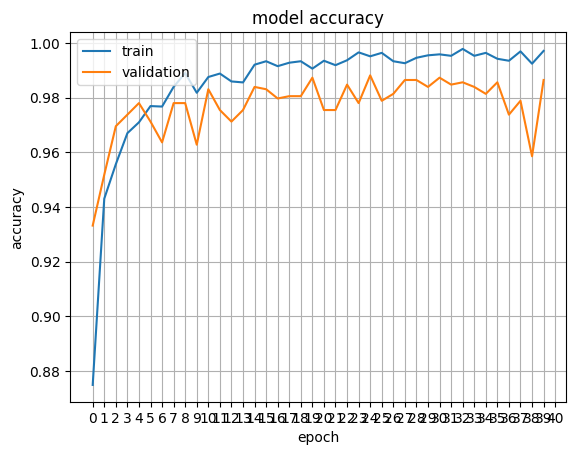

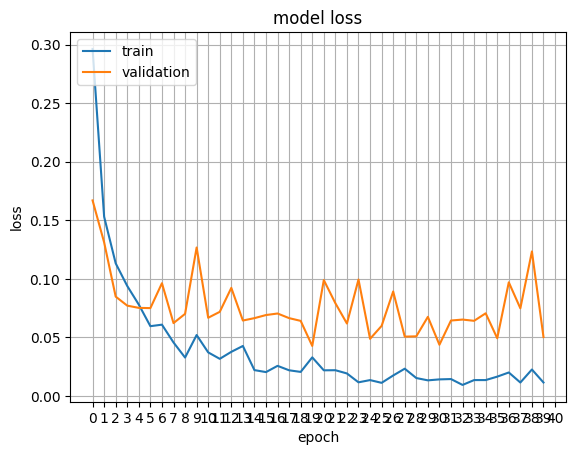

37/37 [==============================] - 3s 65ms/step - loss: 0.0488 - accuracy: 0.9882


In [8]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
import tensorflow_addons as tfa

from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b1best.h5')
a=model1.evaluate(x=test_ds)
a=model1.evaluate (x=val_ds)

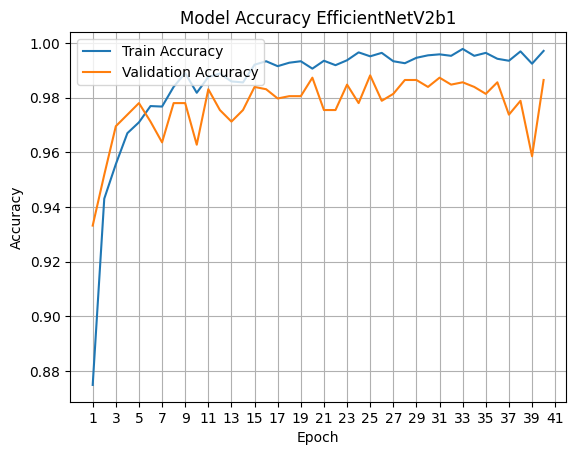

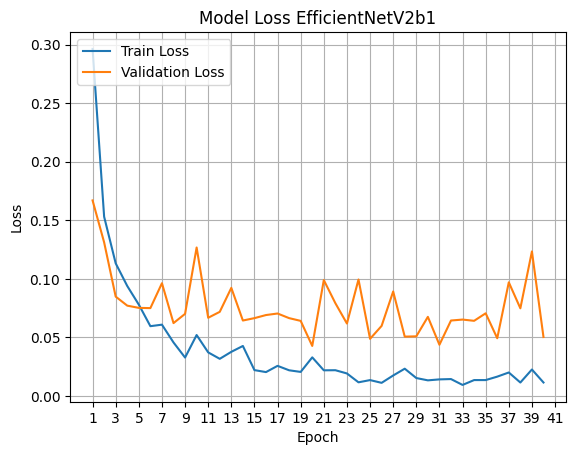

In [2]:
hist={'loss': [0.29635530710220337, 0.15305036306381226, 0.11322780698537827, 0.09388142824172974, 0.07795872539281845, 0.059569746255874634, 0.06085900217294693, 0.04567766934633255, 0.03278152644634247, 0.05200105160474777, 0.03718965873122215, 0.03169030696153641, 0.037661872804164886, 0.04266315698623657, 0.022042782977223396, 0.020358193665742874, 0.025687765330076218, 0.021893274039030075, 0.020510690286755562, 0.03293731063604355, 0.021869411692023277, 0.021959971636533737, 0.019194666296243668, 0.011625006794929504, 0.01352368202060461, 0.011178025044500828, 0.017459269613027573, 0.023253807798027992, 0.01528230868279934, 0.01330495998263359, 0.014127499423921108, 0.014403329230844975, 0.009401013143360615, 0.013538825325667858, 0.013541062362492085, 0.016472170129418373, 0.020025944337248802, 0.01145081501454115, 0.022566767409443855, 0.01147319283336401], 'accuracy': [0.8748422265052795, 0.9430117011070251, 0.9556357264518738, 0.9669972658157349, 0.9709648489952087, 0.9769161343574524, 0.9767357707023621, 0.9839494824409485, 0.98899906873703, 0.9817854166030884, 0.9875563383102417, 0.9888187646865845, 0.985933244228363, 0.9855725765228271, 0.9920649528503418, 0.9933273196220398, 0.9915239214897156, 0.9927862882614136, 0.9933273196220398, 0.9906221628189087, 0.9935076832771301, 0.9918845891952515, 0.9936879873275757, 0.9965735077857971, 0.9951307773590088, 0.9963931441307068, 0.9933273196220398, 0.9926059246063232, 0.9945897459983826, 0.9954914450645447, 0.9958521127700806, 0.9953110814094543, 0.9978358745574951, 0.9953110814094543, 0.9963931441307068, 0.9942290186882019, 0.9935076832771301, 0.996934175491333, 0.9924256205558777, 0.9971145391464233], 'val_loss': [0.16697464883327484, 0.13115113973617554, 0.08481583744287491, 0.0771055743098259, 0.07519963383674622, 0.07500572502613068, 0.09625130146741867, 0.062202949076890945, 0.07008727639913559, 0.12675517797470093, 0.06676246225833893, 0.07181248813867569, 0.09228414297103882, 0.06439872086048126, 0.06644058972597122, 0.06907659024000168, 0.0703900009393692, 0.06644071638584137, 0.0640949085354805, 0.04269227758049965, 0.09893448650836945, 0.07918883860111237, 0.06183865666389465, 0.09944715350866318, 0.04876647889614105, 0.059812672436237335, 0.08920064568519592, 0.050645459443330765, 0.05088844895362854, 0.06752890348434448, 0.04369477927684784, 0.064399354159832, 0.06520934402942657, 0.06415145844221115, 0.07056301087141037, 0.04927587881684303, 0.09702328592538834, 0.0748288556933403, 0.12338491529226303, 0.050306495279073715], 'val_accuracy': [0.933164119720459, 0.9517766237258911, 0.9695431590080261, 0.9737732410430908, 0.9780033826828003, 0.9712352156639099, 0.9636209607124329, 0.9780033826828003, 0.9780033826828003, 0.962774932384491, 0.9830795526504517, 0.9754652976989746, 0.9712352156639099, 0.9754652976989746, 0.9839255213737488, 0.9830795526504517, 0.9796954393386841, 0.980541467666626, 0.980541467666626, 0.9873096346855164, 0.9754652976989746, 0.9754652976989746, 0.9847715497016907, 0.9780033826828003, 0.9881556630134583, 0.9788494110107422, 0.9813874959945679, 0.9864636063575745, 0.9864636063575745, 0.9839255213737488, 0.9873096346855164, 0.9847715497016907, 0.9856175780296326, 0.9839255213737488, 0.9813874959945679, 0.9856175780296326, 0.9737732410430908, 0.9788494110107422, 0.9585448503494263, 0.9864636063575745]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV2b1')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV2b1')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [9]:
#v2b2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetV2B2
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.__version__)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)

image_size = (260, 260)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
IMG_SIZE=260
NUM_CLASSES=2
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetV2B2(include_top=False,weights="imagenet",input_tensor=x,include_preprocessing=True)

    model.trainable = False


    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)


    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()



Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15257571447475549910
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3208424183696729633
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                

                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 65, 65, 128)  512        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 65, 65, 128)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 65, 65, 32)   4096        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_p

                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 224)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 14)     3150        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 224)    3360        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 17, 17, 224)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_p

 block4c_project_bn (BatchNorma  (None, 17, 17, 104)  416        ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_add (Add)              (None, 17, 17, 104)  0           ['block4c_project_bn[0][0]',     
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 17, 17, 416)  43264       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 17, 17, 416)  1664       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
          

 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 17, 17, 720)  6480       ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 17, 17, 720)  2880       ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 17, 17, 720)  0          ['block5b_bn[0][0]']             
 )                                                                                                
          

 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 720)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_se_reshape (Reshape)   (None, 1, 1, 720)    0           ['block5d_se_squeeze[0][0]']     
                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 30)     21630       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 720)    22320       ['block5d_se_reduce[0][0]']      
          

 block5f_se_expand (Conv2D)     (None, 1, 1, 720)    22320       ['block5f_se_reduce[0][0]']      
                                                                                                  
 block5f_se_excite (Multiply)   (None, 17, 17, 720)  0           ['block5f_activation[0][0]',     
                                                                  'block5f_se_expand[0][0]']      
                                                                                                  
 block5f_project_conv (Conv2D)  (None, 17, 17, 120)  86400       ['block5f_se_excite[0][0]']      
                                                                                                  
 block5f_project_bn (BatchNorma  (None, 17, 17, 120)  480        ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_a

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 9, 9, 1248)   259584      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 9, 9, 1248)  4992        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 9, 9, 1248)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv2 (DepthwiseConv  (None, 9, 9, 1248)  11232       ['block6c_expand_activation[0][0]
 2D)      

 block6e_dwconv2 (DepthwiseConv  (None, 9, 9, 1248)  11232       ['block6e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6e_bn (BatchNormalization  (None, 9, 9, 1248)  4992        ['block6e_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6e_activation (Activation  (None, 9, 9, 1248)  0           ['block6e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 1248)        0           ['block6e_activation[0][0]']     
 agePoolin

 block6g_se_squeeze (GlobalAver  (None, 1248)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6g_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6g_se_squeeze[0][0]']     
                                                                                                  
 block6g_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6g_se_reshape[0][0]']     
                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 9, 9, 1248)   0           ['block6g_activation[0][0]',     
          

 block6i_se_excite (Multiply)   (None, 9, 9, 1248)   0           ['block6i_activation[0][0]',     
                                                                  'block6i_se_expand[0][0]']      
                                                                                                  
 block6i_project_conv (Conv2D)  (None, 9, 9, 208)    259584      ['block6i_se_excite[0][0]']      
                                                                                                  
 block6i_project_bn (BatchNorma  (None, 9, 9, 208)   832         ['block6i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6i_add (Add)              (None, 9, 9, 208)    0           ['block6i_project_bn[0][0]',     
                                                                  'block6h_add[0][0]']            
          

In [10]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers[-300:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 260, 260, 3)  0           ['input_3[0][0]']                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 260, 260, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_2 (Normalization  (None, 260, 260, 3)  0          ['rescaling_2[0][0]'] 

                                                                                                  
 block2c_project_conv (Conv2D)  (None, 65, 65, 32)   4096        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 65, 65, 32)  128         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_add (Add)              (None, 65, 65, 32)   0           ['block2c_project_bn[0][0]',     
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block3a_e

                                                                                                  
 block4a_se_excite (Multiply)   (None, 17, 17, 224)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 17, 17, 104)  23296       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 17, 17, 104)  416        ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 17, 17, 416)  43264       ['block4a_project_bn[0][0]']     
          

 block4d_expand_conv (Conv2D)   (None, 17, 17, 416)  43264       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 17, 17, 416)  1664       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 17, 17, 416)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv2 (DepthwiseConv  (None, 17, 17, 416)  3744       ['block4d_expand_activation[0][0]
 2D)                                                             ']                               
          

 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 17, 17, 720)  0          ['block5b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5b_se_squeeze (GlobalAver  (None, 720)         0           ['block5b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5b_se_reshape (Reshape)   (None, 1, 1, 720)    0           ['block5b_se_squeeze[0][0]']     
                                                                                                  
 block5b_s

                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 30)     21630       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 720)    22320       ['block5d_se_reduce[0][0]']      
                                                                                                  
 block5d_se_excite (Multiply)   (None, 17, 17, 720)  0           ['block5d_activation[0][0]',     
                                                                  'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_project_conv (Conv2D)  (None, 17, 17, 120)  86400       ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_p

                                                                                                  
 block5f_project_bn (BatchNorma  (None, 17, 17, 120)  480        ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_add (Add)              (None, 17, 17, 120)  0           ['block5f_project_bn[0][0]',     
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 17, 17, 720)  86400       ['block5f_add[0][0]']            
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 17, 17, 720)  2880       ['block6a_expand_conv[0][0]']    
 ization) 

 block6c_expand_activation (Act  (None, 9, 9, 1248)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv2 (DepthwiseConv  (None, 9, 9, 1248)  11232       ['block6c_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6c_bn (BatchNormalization  (None, 9, 9, 1248)  4992        ['block6c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6c_activation (Activation  (None, 9, 9, 1248)  0           ['block6c_bn[0][0]']             
 )        

 block6e_activation (Activation  (None, 9, 9, 1248)  0           ['block6e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 1248)        0           ['block6e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_s

                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 9, 9, 1248)   0           ['block6g_activation[0][0]',     
                                                                  'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 9, 9, 208)    259584      ['block6g_se_excite[0][0]']      
                                                                                                  
 block6g_project_bn (BatchNorma  (None, 9, 9, 208)   832         ['block6g_project_conv[0][0]']   
 lization)                                                                                        
          

 lization)                                                                                        
                                                                                                  
 block6i_add (Add)              (None, 9, 9, 208)    0           ['block6i_project_bn[0][0]',     
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_expand_conv (Conv2D)   (None, 9, 9, 1248)   259584      ['block6i_add[0][0]']            
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 9, 9, 1248)  4992        ['block6j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6j_e

In [11]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b2best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]

hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 82s 309ms/step - loss: 0.2726 - accuracy: 0.8907 - val_loss: 0.2179 - val_accuracy: 0.9052
Epoch 2/40
174/174 [==============================] - 44s 249ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.1061 - val_accuracy: 0.9569
Epoch 3/40
174/174 [==============================] - 44s 253ms/step - loss: 0.1050 - accuracy: 0.9618 - val_loss: 0.1543 - val_accuracy: 0.9391
Epoch 4/40
174/174 [==============================] - 43s 248ms/step - loss: 0.0906 - accuracy: 0.9677 - val_loss: 0.0893 - val_accuracy: 0.9645
Epoch 5/40
174/174 [==============================] - 44s 248ms/step - loss: 0.0693 - accuracy: 0.9744 - val_loss: 0.0959 - val_accuracy: 0.9628
Epoch 6/40
174/174 [==============================] - 43s 242ms/step - loss: 0.0631 - accuracy: 0.9794 - val_loss: 0.0668 - val_accuracy: 0.9772
Epoch 7/40
174/174 [==============================] - 43s 245ms/step - loss: 0.0460 - accuracy: 0.9827 - val_loss: 0.0756 - val_ac

{'loss': [0.2725939452648163, 0.1564168781042099, 0.10502254962921143, 0.09061957150697708, 0.06932669132947922, 0.06309359520673752, 0.04596307873725891, 0.04330205172300339, 0.03809412568807602, 0.034285448491573334, 0.03936279937624931, 0.03266354277729988, 0.028814243152737617, 0.026989594101905823, 0.02576783299446106, 0.02325771376490593, 0.022772807627916336, 0.016105834394693375, 0.017233146354556084, 0.024609681218862534, 0.02937205694615841, 0.01690824143588543, 0.01476742047816515, 0.008877956308424473, 0.013116572983562946, 0.011789925396442413, 0.01699492707848549, 0.031394146382808685, 0.01930280774831772, 0.015945198014378548, 0.018290184438228607, 0.013025961816310883, 0.013344969600439072, 0.014499806798994541, 0.01682198792695999, 0.014417996630072594, 0.012495544739067554, 0.017345920205116272, 0.01806374453008175, 0.01874062791466713], 'accuracy': [0.8907123804092407, 0.9372407793998718, 0.9617673754692078, 0.9677186608314514, 0.9743913412094116, 0.9794409275054932,

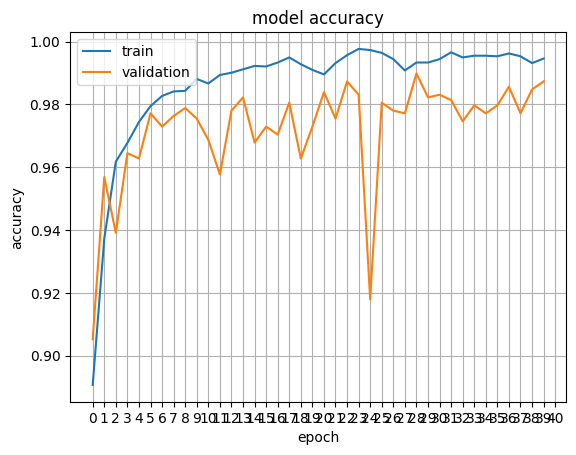

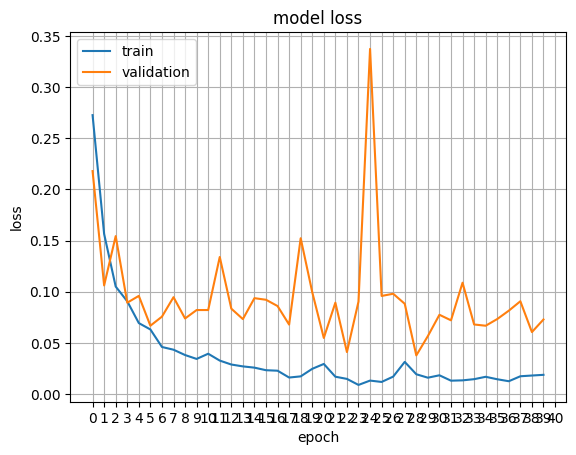

37/37 [==============================] - 3s 68ms/step - loss: 0.0377 - accuracy: 0.9898


In [12]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
import tensorflow_addons as tfa

from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b2best.h5')
a=model1.evaluate(
    x=test_ds
)
a=model1.evaluate (
    x=val_ds
)

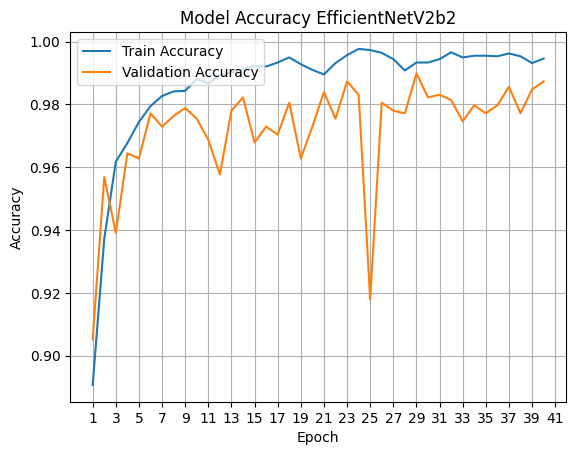

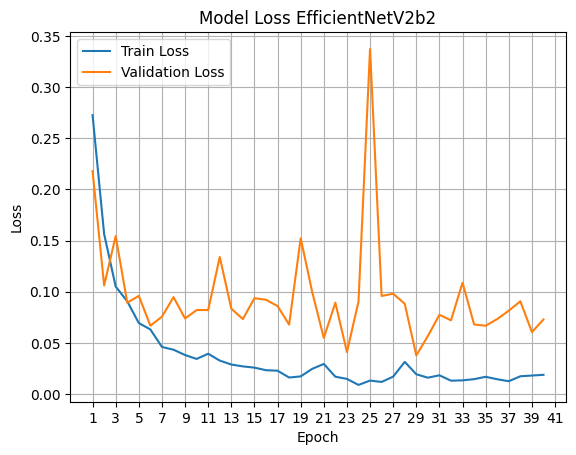

In [3]:
hist={'loss': [0.2725939452648163, 0.1564168781042099, 0.10502254962921143, 0.09061957150697708, 0.06932669132947922, 0.06309359520673752, 0.04596307873725891, 0.04330205172300339, 0.03809412568807602, 0.034285448491573334, 0.03936279937624931, 0.03266354277729988, 0.028814243152737617, 0.026989594101905823, 0.02576783299446106, 0.02325771376490593, 0.022772807627916336, 0.016105834394693375, 0.017233146354556084, 0.024609681218862534, 0.02937205694615841, 0.01690824143588543, 0.01476742047816515, 0.008877956308424473, 0.013116572983562946, 0.011789925396442413, 0.01699492707848549, 0.031394146382808685, 0.01930280774831772, 0.015945198014378548, 0.018290184438228607, 0.013025961816310883, 0.013344969600439072, 0.014499806798994541, 0.01682198792695999, 0.014417996630072594, 0.012495544739067554, 0.017345920205116272, 0.01806374453008175, 0.01874062791466713], 'accuracy': [0.8907123804092407, 0.9372407793998718, 0.9617673754692078, 0.9677186608314514, 0.9743913412094116, 0.9794409275054932, 0.9826871156692505, 0.9841298460960388, 0.9843102097511292, 0.9880973696708679, 0.9866546392440796, 0.9893597960472107, 0.9900811314582825, 0.9911631941795349, 0.9922452569007874, 0.9920649528503418, 0.9933273196220398, 0.9949504137039185, 0.9927862882614136, 0.9909828901290894, 0.9895401000976562, 0.9931469559669495, 0.9956717491149902, 0.9976555705070496, 0.9972948431968689, 0.9963931441307068, 0.9944093823432922, 0.990802526473999, 0.9933273196220398, 0.9933273196220398, 0.9944093823432922, 0.9965735077857971, 0.9949504137039185, 0.9954914450645447, 0.9954914450645447, 0.9953110814094543, 0.9962127804756165, 0.9953110814094543, 0.9931469559669495, 0.9945897459983826], 'val_loss': [0.21789449453353882, 0.10614040493965149, 0.15434980392456055, 0.08925174921751022, 0.09592849761247635, 0.06675440818071365, 0.07560352236032486, 0.09463305026292801, 0.07383204251527786, 0.08207449316978455, 0.08208447694778442, 0.13392764329910278, 0.08342450112104416, 0.07322417944669724, 0.09368299692869186, 0.09211566299200058, 0.08597743511199951, 0.06784938275814056, 0.1522863209247589, 0.09953046590089798, 0.05480474978685379, 0.08927413076162338, 0.040995728224515915, 0.09029549360275269, 0.3373202383518219, 0.0958477333188057, 0.09800896793603897, 0.08819354325532913, 0.03773411735892296, 0.05662327632308006, 0.07744408398866653, 0.0720193162560463, 0.10879437625408173, 0.06795968860387802, 0.0667358860373497, 0.07326872646808624, 0.08145412057638168, 0.09065227210521698, 0.060535676777362823, 0.07285048812627792], 'val_accuracy': [0.9052453637123108, 0.9568527936935425, 0.9390863180160522, 0.9644669890403748, 0.962774932384491, 0.9771573543548584, 0.9729272127151489, 0.9763113260269165, 0.9788494110107422, 0.9754652976989746, 0.9686971306800842, 0.9576988220214844, 0.9780033826828003, 0.9822335243225098, 0.9678511023521423, 0.9729272127151489, 0.970389187335968, 0.980541467666626, 0.962774932384491, 0.9729272127151489, 0.9839255213737488, 0.9754652976989746, 0.9873096346855164, 0.9830795526504517, 0.9179357290267944, 0.980541467666626, 0.9780033826828003, 0.9771573543548584, 0.989847719669342, 0.9822335243225098, 0.9830795526504517, 0.9813874959945679, 0.9746192693710327, 0.9796954393386841, 0.9771573543548584, 0.9796954393386841, 0.9856175780296326, 0.9771573543548584, 0.9847715497016907, 0.9873096346855164]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV2b2')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV2b2')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [14]:
#v2b3
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.applications import EfficientNetV2B3
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
print(device_lib.list_local_devices())
print(tf.__version__)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)
image_size = (300, 300)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
IMG_SIZE=300
NUM_CLASSES=2
import tensorflow as tf
from tensorflow.keras import layers


def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetV2B3(include_top=False,weights="imagenet",input_tensor=x,include_preprocessing=True)

    model.trainable = False


    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()



Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9736351269029607185
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18106924587524824781
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                

                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 75, 75, 160)  640        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 75, 75, 160)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 75, 75, 40)   6400        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_p

                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 224)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 14)     3150        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 224)    3360        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 19, 19, 224)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_p

 block4c_project_bn (BatchNorma  (None, 19, 19, 112)  448        ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_add (Add)              (None, 19, 19, 112)  0           ['block4c_project_bn[0][0]',     
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 19, 19, 448)  50176       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 19, 19, 448)  1792       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
          

 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 19, 19, 672)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, 19, 19, 672)  6048       ['block5a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 19, 19, 672)  2688       ['block5a_dwconv2[0][0]']        
 )                                                                                                
          

 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 816)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 816)    0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 34)     27778       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5c_se_reduce[0][0]']      
          

 block5e_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_se_excite (Multiply)   (None, 19, 19, 816)  0           ['block5e_activation[0][0]',     
                                                                  'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_project_conv (Conv2D)  (None, 19, 19, 136)  110976      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 19, 19, 136)  544        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_a

                                                                                                  
 block5g_add (Add)              (None, 19, 19, 136)  0           ['block5g_project_bn[0][0]',     
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 19, 19, 816)  110976      ['block5g_add[0][0]']            
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 19, 19, 816)  3264       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 19, 19, 816)  0          ['block6a_expand_bn[0][0]']      
 ivation) 

 ivation)                       )                                                                 
                                                                                                  
 block6c_dwconv2 (DepthwiseConv  (None, 10, 10, 1392  12528      ['block6c_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6c_bn (BatchNormalization  (None, 10, 10, 1392  5568       ['block6c_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6c_activation (Activation  (None, 10, 10, 1392  0          ['block6c_bn[0][0]']             
 )                              )                                                                 
          

                                                                                                  
 block6e_activation (Activation  (None, 10, 10, 1392  0          ['block6e_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 1392)        0           ['block6e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6e_se_reshape[0][0]']     
          

 block6g_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6g_se_squeeze[0][0]']     
                                                                                                  
 block6g_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6g_se_reshape[0][0]']     
                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 10, 10, 1392  0           ['block6g_activation[0][0]',     
                                )                                 'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 10, 10, 232)  322944      ['block6g_se_excite[0][0]']      
          

                                )                                 'block6i_se_expand[0][0]']      
                                                                                                  
 block6i_project_conv (Conv2D)  (None, 10, 10, 232)  322944      ['block6i_se_excite[0][0]']      
                                                                                                  
 block6i_project_bn (BatchNorma  (None, 10, 10, 232)  928        ['block6i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6i_add (Add)              (None, 10, 10, 232)  0           ['block6i_project_bn[0][0]',     
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_e

 block6k_add (Add)              (None, 10, 10, 232)  0           ['block6k_project_bn[0][0]',     
                                                                  'block6j_add[0][0]']            
                                                                                                  
 block6l_expand_conv (Conv2D)   (None, 10, 10, 1392  322944      ['block6k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6l_expand_bn (BatchNormal  (None, 10, 10, 1392  5568       ['block6l_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6l_expand_activation (Act  (None, 10, 10, 1392  0          ['block6l_expand_bn[0][0]']      
 ivation) 

In [15]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 300, 300, 3)  0           ['input_4[0][0]']                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 300, 300, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_3 (Normalization  (None, 300, 300, 3)  0          ['rescaling_3[0][0]'] 

                                                                                                  
 block2c_project_conv (Conv2D)  (None, 75, 75, 40)   6400        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 75, 75, 40)  160         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_add (Add)              (None, 75, 75, 40)   0           ['block2c_project_bn[0][0]',     
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block3a_e

                                                                                                  
 block4a_se_excite (Multiply)   (None, 19, 19, 224)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 19, 19, 112)  25088       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 19, 19, 112)  448        ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 19, 19, 448)  50176       ['block4a_project_bn[0][0]']     
          

 block4d_expand_conv (Conv2D)   (None, 19, 19, 448)  50176       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 19, 19, 448)  1792       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 19, 19, 448)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv2 (DepthwiseConv  (None, 19, 19, 448)  4032       ['block4d_expand_activation[0][0]
 2D)                                                             ']                               
          

 2D)                                                             ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 19, 19, 672)  2688       ['block5a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 19, 19, 672)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 672)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 34)     27778       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 816)    28560       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 19, 19, 816)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 19, 19, 136)  110976      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_p

                                                                                                  
 block5e_project_bn (BatchNorma  (None, 19, 19, 136)  544        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_add (Add)              (None, 19, 19, 136)  0           ['block5e_project_bn[0][0]',     
                                                                  'block5d_add[0][0]']            
                                                                                                  
 block5f_expand_conv (Conv2D)   (None, 19, 19, 816)  110976      ['block5e_add[0][0]']            
                                                                                                  
 block5f_expand_bn (BatchNormal  (None, 19, 19, 816)  3264       ['block5f_expand_conv[0][0]']    
 ization) 

 block6a_expand_bn (BatchNormal  (None, 19, 19, 816)  3264       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 19, 19, 816)  0          ['block6a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6a_dwconv2 (DepthwiseConv  (None, 10, 10, 816)  7344       ['block6a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 10, 10, 816)  3264       ['block6a_dwconv2[0][0]']        
 )        

 )                              )                                                                 
                                                                                                  
 block6c_activation (Activation  (None, 10, 10, 1392  0          ['block6c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 1392)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6e_se_reduce[0][0]']      
                                                                                                  
 block6e_se_excite (Multiply)   (None, 10, 10, 1392  0           ['block6e_activation[0][0]',     
                                )                                 'block6e_se_expand[0][0]']      
                                                                                                  
 block6e_p

 block6g_se_excite (Multiply)   (None, 10, 10, 1392  0           ['block6g_activation[0][0]',     
                                )                                 'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 10, 10, 232)  322944      ['block6g_se_excite[0][0]']      
                                                                                                  
 block6g_project_bn (BatchNorma  (None, 10, 10, 232)  928        ['block6g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6g_add (Add)              (None, 10, 10, 232)  0           ['block6g_project_bn[0][0]',     
                                                                  'block6f_add[0][0]']            
          

                                                                                                  
 block6i_add (Add)              (None, 10, 10, 232)  0           ['block6i_project_bn[0][0]',     
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_expand_conv (Conv2D)   (None, 10, 10, 1392  322944      ['block6i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 10, 10, 1392  5568       ['block6j_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6j_e

 block6l_expand_bn (BatchNormal  (None, 10, 10, 1392  5568       ['block6l_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6l_expand_activation (Act  (None, 10, 10, 1392  0          ['block6l_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6l_dwconv2 (DepthwiseConv  (None, 10, 10, 1392  12528      ['block6l_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 10, 10, 1392  5568       ['block6l_dwconv2[0][0]']        
 )        

In [16]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b3best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 93s 351ms/step - loss: 0.2897 - accuracy: 0.8794 - val_loss: 0.1684 - val_accuracy: 0.9357
Epoch 2/40
174/174 [==============================] - 51s 290ms/step - loss: 0.1310 - accuracy: 0.9506 - val_loss: 0.1630 - val_accuracy: 0.9382
Epoch 3/40
174/174 [==============================] - 52s 296ms/step - loss: 0.0908 - accuracy: 0.9657 - val_loss: 0.0987 - val_accuracy: 0.9645
Epoch 4/40
174/174 [==============================] - 52s 296ms/step - loss: 0.0792 - accuracy: 0.9693 - val_loss: 0.0792 - val_accuracy: 0.9712
Epoch 5/40
174/174 [==============================] - 51s 287ms/step - loss: 0.0494 - accuracy: 0.9841 - val_loss: 0.1063 - val_accuracy: 0.9679
Epoch 6/40
174/174 [==============================] - 50s 283ms/step - loss: 0.0499 - accuracy: 0.9805 - val_loss: 0.0899 - val_accuracy: 0.9662
Epoch 7/40
174/174 [==============================] - 51s 290ms/step - loss: 0.0404 - accuracy: 0.9865 - val_loss: 0.0636 - val_ac

{'loss': [0.2896578311920166, 0.1309700310230255, 0.0907747894525528, 0.07920201122760773, 0.04943930357694626, 0.049934837967157364, 0.04043332487344742, 0.03943122178316116, 0.042241696268320084, 0.017250964418053627, 0.020969798788428307, 0.03192667290568352, 0.028190530836582184, 0.02173665165901184, 0.008604740723967552, 0.01778346672654152, 0.01992565393447876, 0.019320828840136528, 0.017099611461162567, 0.01468881219625473, 0.011325730010867119, 0.013227557763457298, 0.014374745078384876, 0.013820908963680267, 0.001336442306637764, 0.012369358912110329, 0.022280234843492508, 0.007983892224729061, 0.011833317577838898, 0.02361212484538555, 0.021154860034585, 0.010999448597431183, 0.005844454746693373, 0.019913464784622192, 0.007056755945086479, 0.013720652088522911, 0.013400889001786709, 0.009432833641767502, 0.0042434982024133205, 0.01570555940270424], 'accuracy': [0.8793507814407349, 0.9505861401557922, 0.9657348990440369, 0.9693417549133301, 0.9841298460960388, 0.9805229902267

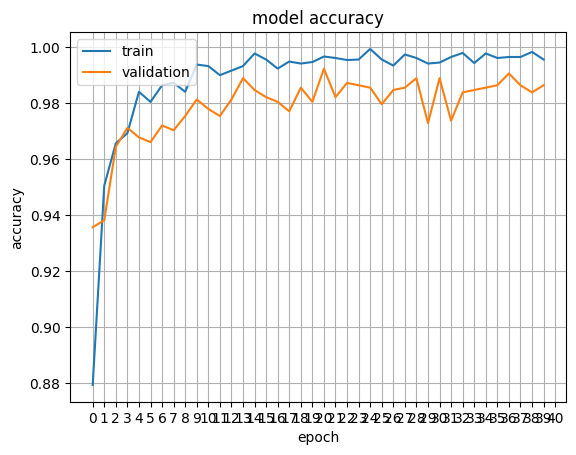

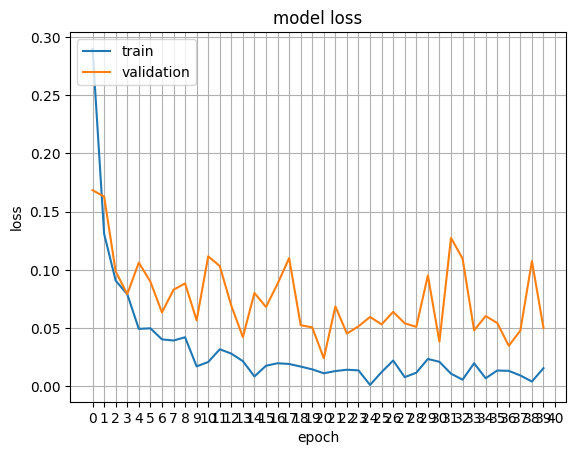

37/37 [==============================] - 4s 103ms/step - loss: 0.0242 - accuracy: 0.9924


In [17]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()
plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()
plot_hist(hist)
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2b3best.h5')
a=model1.evaluate(
    x=test_ds
)
a=model1.evaluate (
    x=val_ds
)

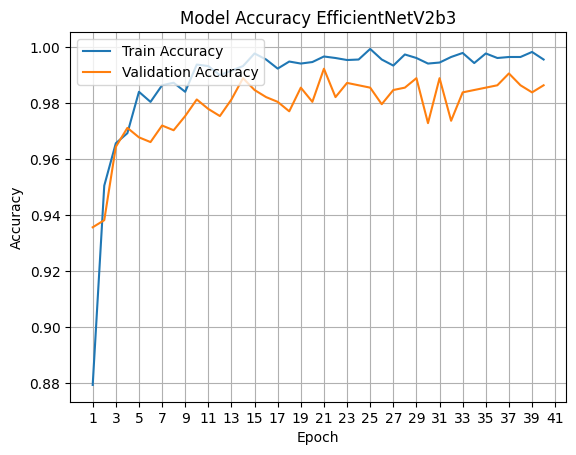

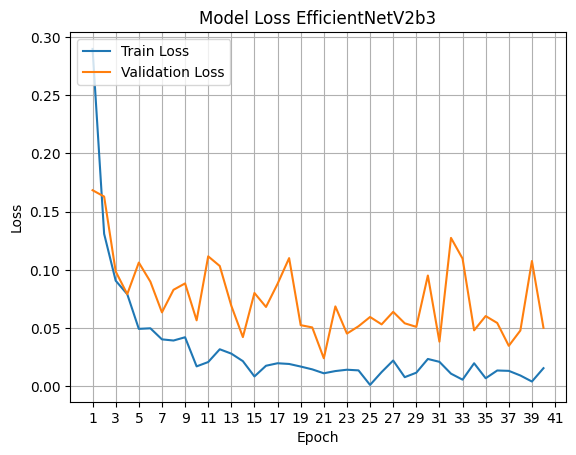

In [4]:
hist={'loss': [0.2896578311920166, 0.1309700310230255, 0.0907747894525528, 0.07920201122760773, 0.04943930357694626, 0.049934837967157364, 0.04043332487344742, 0.03943122178316116, 0.042241696268320084, 0.017250964418053627, 0.020969798788428307, 0.03192667290568352, 0.028190530836582184, 0.02173665165901184, 0.008604740723967552, 0.01778346672654152, 0.01992565393447876, 0.019320828840136528, 0.017099611461162567, 0.01468881219625473, 0.011325730010867119, 0.013227557763457298, 0.014374745078384876, 0.013820908963680267, 0.001336442306637764, 0.012369358912110329, 0.022280234843492508, 0.007983892224729061, 0.011833317577838898, 0.02361212484538555, 0.021154860034585, 0.010999448597431183, 0.005844454746693373, 0.019913464784622192, 0.007056755945086479, 0.013720652088522911, 0.013400889001786709, 0.009432833641767502, 0.0042434982024133205, 0.01570555940270424], 'accuracy': [0.8793507814407349, 0.9505861401557922, 0.9657348990440369, 0.9693417549133301, 0.9841298460960388, 0.9805229902267456, 0.9864742755889893, 0.9873760342597961, 0.9841298460960388, 0.993868350982666, 0.9933273196220398, 0.9900811314582825, 0.9917042255401611, 0.9933273196220398, 0.9978358745574951, 0.9956717491149902, 0.9924256205558777, 0.9949504137039185, 0.9942290186882019, 0.9947700500488281, 0.9967538118362427, 0.9962127804756165, 0.9954914450645447, 0.9956717491149902, 0.9994589686393738, 0.9956717491149902, 0.9935076832771301, 0.9974752068519592, 0.9962127804756165, 0.9942290186882019, 0.9945897459983826, 0.9965735077857971, 0.9980162382125854, 0.9944093823432922, 0.9978358745574951, 0.9962127804756165, 0.9965735077857971, 0.9965735077857971, 0.9983769059181213, 0.9956717491149902], 'val_loss': [0.16840432584285736, 0.16296860575675964, 0.0986735001206398, 0.07924855500459671, 0.10632046312093735, 0.08993938565254211, 0.06357746571302414, 0.08295421302318573, 0.08844739943742752, 0.056755974888801575, 0.1116754487156868, 0.1033993735909462, 0.06923864781856537, 0.042380139231681824, 0.0802299901843071, 0.06825248152017593, 0.08809307217597961, 0.11015117168426514, 0.052617453038692474, 0.05066841468214989, 0.024212360382080078, 0.068710558116436, 0.04537561908364296, 0.051655255258083344, 0.059630386531353, 0.05329396203160286, 0.0640355721116066, 0.05421053245663643, 0.05116533860564232, 0.09522628784179688, 0.03845978155732155, 0.12750659883022308, 0.1097617894411087, 0.048196759074926376, 0.06042258441448212, 0.05449399724602699, 0.0348912850022316, 0.04801350459456444, 0.10763975977897644, 0.050293464213609695], 'val_accuracy': [0.9357022047042847, 0.9382402896881104, 0.9644669890403748, 0.9712352156639099, 0.9678511023521423, 0.9661590456962585, 0.9720812439918518, 0.970389187335968, 0.9754652976989746, 0.9813874959945679, 0.9780033826828003, 0.9754652976989746, 0.9813874959945679, 0.9890016913414001, 0.9847715497016907, 0.9822335243225098, 0.980541467666626, 0.9771573543548584, 0.9856175780296326, 0.980541467666626, 0.9923858046531677, 0.9822335243225098, 0.9873096346855164, 0.9864636063575745, 0.9856175780296326, 0.9796954393386841, 0.9847715497016907, 0.9856175780296326, 0.9890016913414001, 0.9729272127151489, 0.9890016913414001, 0.9737732410430908, 0.9839255213737488, 0.9847715497016907, 0.9856175780296326, 0.9864636063575745, 0.9906937479972839, 0.9864636063575745, 0.9839255213737488, 0.9864636063575745]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV2b3')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV2b3')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [18]:
#v2bs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.applications import EfficientNetV2S
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
print(device_lib.list_local_devices())
print(tf.__version__)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)

image_size = (380, 380)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
IMG_SIZE=380
NUM_CLASSES=2

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetV2S(include_top=False,weights="imagenet",input_tensor=x,include_preprocessing=True)

    model.trainable = False


    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)


    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()



Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16713141246781704773
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15509888949714383849
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                               

                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 95, 95, 192)  768        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 95, 95, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 95, 95, 48)   9216        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_p

 block3d_expand_bn (BatchNormal  (None, 48, 48, 256)  1024       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 48, 48, 256)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_project_conv (Conv2D)  (None, 48, 48, 64)   16384       ['block3d_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3d_project_bn (BatchNorma  (None, 48, 48, 64)  256         ['block3d_project_conv[0][0]']   
 lization)

 block4b_add (Add)              (None, 24, 24, 128)  0           ['block4b_project_bn[0][0]',     
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 24, 24, 512)  65536       ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 24, 24, 512)  2048       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 24, 24, 512)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
          

 ivation)                                                                                         
                                                                                                  
 block4e_dwconv2 (DepthwiseConv  (None, 24, 24, 512)  4608       ['block4e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4e_bn (BatchNormalization  (None, 24, 24, 512)  2048       ['block4e_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4e_activation (Activation  (None, 24, 24, 512)  0          ['block4e_bn[0][0]']             
 )                                                                                                
          

 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 768)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 32)     24608       ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 768)    25344       ['block5a_se_reduce[0][0]']      
          

                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 24, 24, 160)  153600      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 24, 24, 160)  640        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_add (Add)              (None, 24, 24, 160)  0           ['block5c_project_bn[0][0]',     
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block5d_e

                                                                                                  
 block5f_expand_conv (Conv2D)   (None, 24, 24, 960)  153600      ['block5e_add[0][0]']            
                                                                                                  
 block5f_expand_bn (BatchNormal  (None, 24, 24, 960)  3840       ['block5f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5f_expand_activation (Act  (None, 24, 24, 960)  0          ['block5f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5f_dwconv2 (DepthwiseConv  (None, 24, 24, 960)  8640       ['block5f_expand_activation[0][0]
 2D)      

 block5h_dwconv2 (DepthwiseConv  (None, 24, 24, 960)  8640       ['block5h_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5h_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5h_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5h_activation (Activation  (None, 24, 24, 960)  0          ['block5h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5h_se_squeeze (GlobalAver  (None, 960)         0           ['block5h_activation[0][0]']     
 agePoolin

 block6a_se_squeeze (GlobalAver  (None, 960)         0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 12, 12, 960)  0           ['block6a_activation[0][0]',     
          

                                )                                 'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 12, 12, 256)  393216      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_add (Add)              (None, 12, 12, 256)  0           ['block6c_project_bn[0][0]',     
                                                                  'block6b_add[0][0]']            
                                                                                                  
 block6d_e

 block6e_add (Add)              (None, 12, 12, 256)  0           ['block6e_project_bn[0][0]',     
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6e_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6f_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6f_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6f_expand_activation (Act  (None, 12, 12, 1536  0          ['block6f_expand_bn[0][0]']      
 ivation) 

 ization)                       )                                                                 
                                                                                                  
 block6h_expand_activation (Act  (None, 12, 12, 1536  0          ['block6h_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6h_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6h_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6h_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6h_dwconv2[0][0]']        
 )                              )                                                                 
          

                                                                                                  
 block6j_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6j_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6j_activation (Activation  (None, 12, 12, 1536  0          ['block6j_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6j_se_squeeze (GlobalAver  (None, 1536)        0           ['block6j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6j_s

 block6l_se_squeeze (GlobalAver  (None, 1536)        0           ['block6l_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6l_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6l_se_squeeze[0][0]']     
                                                                                                  
 block6l_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6l_se_reshape[0][0]']     
                                                                                                  
 block6l_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6l_se_reduce[0][0]']      
                                                                                                  
 block6l_se_excite (Multiply)   (None, 12, 12, 1536  0           ['block6l_activation[0][0]',     
          

 block6n_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6n_se_reduce[0][0]']      
                                                                                                  
 block6n_se_excite (Multiply)   (None, 12, 12, 1536  0           ['block6n_activation[0][0]',     
                                )                                 'block6n_se_expand[0][0]']      
                                                                                                  
 block6n_project_conv (Conv2D)  (None, 12, 12, 256)  393216      ['block6n_se_excite[0][0]']      
                                                                                                  
 block6n_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6n_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6n_a

In [19]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 380, 380, 3)  0           ['input_5[0][0]']                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 380, 380, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 stem_conv (Conv2D)             (None, 190, 190, 24  648         ['rescaling_4[0][0]'] 

                                                                                                  
 block2c_project_conv (Conv2D)  (None, 95, 95, 48)   9216        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 95, 95, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_add (Add)              (None, 95, 95, 48)   0           ['block2c_project_bn[0][0]',     
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_e

 block3d_project_conv (Conv2D)  (None, 48, 48, 64)   16384       ['block3d_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3d_project_bn (BatchNorma  (None, 48, 48, 64)  256         ['block3d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3d_add (Add)              (None, 48, 48, 64)   0           ['block3d_project_bn[0][0]',     
                                                                  'block3c_add[0][0]']            
                                                                                                  
 block4a_expand_conv (Conv2D)   (None, 48, 48, 256)  16384       ['block3d_add[0][0]']            
          

 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 24, 24, 512)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_dwconv2 (DepthwiseConv  (None, 24, 24, 512)  4608       ['block4c_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4c_bn (BatchNormalization  (None, 24, 24, 512)  2048       ['block4c_dwconv2[0][0]']        
 )                                                                                                
          

 )                                                                                                
                                                                                                  
 block4e_activation (Activation  (None, 24, 24, 512)  0          ['block4e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 512)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4e_se_reshape (Reshape)   (None, 1, 1, 512)    0           ['block4e_se_squeeze[0][0]']     
                                                                                                  
 block4e_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 32)     24608       ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 768)    25344       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 24, 24, 768)  0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 24, 24, 160)  122880      ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

                                                                                                  
 block5c_add (Add)              (None, 24, 24, 160)  0           ['block5c_project_bn[0][0]',     
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block5d_expand_conv (Conv2D)   (None, 24, 24, 960)  153600      ['block5c_add[0][0]']            
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 24, 24, 960)  3840       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5d_expand_activation (Act  (None, 24, 24, 960)  0          ['block5d_expand_bn[0][0]']      
 ivation) 

 block5f_expand_activation (Act  (None, 24, 24, 960)  0          ['block5f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5f_dwconv2 (DepthwiseConv  (None, 24, 24, 960)  8640       ['block5f_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5f_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5f_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5f_activation (Activation  (None, 24, 24, 960)  0          ['block5f_bn[0][0]']             
 )        

 block5h_activation (Activation  (None, 24, 24, 960)  0          ['block5h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5h_se_squeeze (GlobalAver  (None, 960)         0           ['block5h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5h_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5h_se_squeeze[0][0]']     
                                                                                                  
 block5h_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5h_se_reshape[0][0]']     
                                                                                                  
 block5h_s

                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 12, 12, 960)  0           ['block6a_activation[0][0]',     
                                                                  'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_project_conv (Conv2D)  (None, 12, 12, 256)  245760      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6a_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6c_add (Add)              (None, 12, 12, 256)  0           ['block6c_project_bn[0][0]',     
                                                                  'block6b_add[0][0]']            
                                                                                                  
 block6d_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6c_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6d_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6d_e

 block6f_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6f_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6f_expand_activation (Act  (None, 12, 12, 1536  0          ['block6f_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6f_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6f_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6f_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6f_dwconv2[0][0]']        
 )        

 2D)                            )                                ']                               
                                                                                                  
 block6h_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6h_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6h_activation (Activation  (None, 12, 12, 1536  0          ['block6h_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6h_se_squeeze (GlobalAver  (None, 1536)        0           ['block6h_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block6j_se_squeeze (GlobalAver  (None, 1536)        0           ['block6j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6j_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6j_se_squeeze[0][0]']     
                                                                                                  
 block6j_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6j_se_reshape[0][0]']     
                                                                                                  
 block6j_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6j_se_reduce[0][0]']      
                                                                                                  
 block6j_s

                                                                                                  
 block6l_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6l_se_reduce[0][0]']      
                                                                                                  
 block6l_se_excite (Multiply)   (None, 12, 12, 1536  0           ['block6l_activation[0][0]',     
                                )                                 'block6l_se_expand[0][0]']      
                                                                                                  
 block6l_project_conv (Conv2D)  (None, 12, 12, 256)  393216      ['block6l_se_excite[0][0]']      
                                                                                                  
 block6l_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6l_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6n_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6n_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6n_add (Add)              (None, 12, 12, 256)  0           ['block6n_project_bn[0][0]',     
                                                                  'block6m_add[0][0]']            
                                                                                                  
 block6o_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6n_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6o_e

In [20]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2bSbest.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 117s 486ms/step - loss: 0.2647 - accuracy: 0.8884 - val_loss: 0.1651 - val_accuracy: 0.9433
Epoch 2/40
174/174 [==============================] - 72s 411ms/step - loss: 0.1325 - accuracy: 0.9491 - val_loss: 0.1873 - val_accuracy: 0.9306
Epoch 3/40
174/174 [==============================] - 73s 420ms/step - loss: 0.0835 - accuracy: 0.9704 - val_loss: 0.0655 - val_accuracy: 0.9772
Epoch 4/40
174/174 [==============================] - 72s 413ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.0828 - val_accuracy: 0.9653
Epoch 5/40
174/174 [==============================] - 74s 426ms/step - loss: 0.0500 - accuracy: 0.9796 - val_loss: 0.0601 - val_accuracy: 0.9797
Epoch 6/40
174/174 [==============================] - 72s 412ms/step - loss: 0.0427 - accuracy: 0.9856 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 7/40
174/174 [==============================] - 71s 405ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0819 - val_a

{'loss': [0.264741450548172, 0.13247457146644592, 0.0834667906165123, 0.059936150908470154, 0.05002394691109657, 0.04268583655357361, 0.03854324668645859, 0.0254630446434021, 0.020970918238162994, 0.022553367540240288, 0.020816035568714142, 0.01825694926083088, 0.014449145644903183, 0.018543358892202377, 0.01449905801564455, 0.02738357149064541, 0.02071586810052395, 0.009399832226336002, 0.009601105004549026, 0.024289093911647797, 0.01999579928815365, 0.0033788238652050495, 0.005567456595599651, 0.021160749718546867, 0.026997443288564682, 0.009925649501383305, 0.001366245560348034, 0.013456410728394985, 0.015415438450872898, 0.023312317207455635, 0.01576298289000988, 0.011846492998301983, 0.0107108810916543, 0.00931143295019865, 0.005121785216033459, 0.011486304923892021, 0.014968416653573513, 0.013295985758304596, 0.005437063053250313, 0.010142702609300613], 'accuracy': [0.8883678913116455, 0.9491433501243591, 0.9704238176345825, 0.9792606234550476, 0.9796212911605835, 0.9855725765228

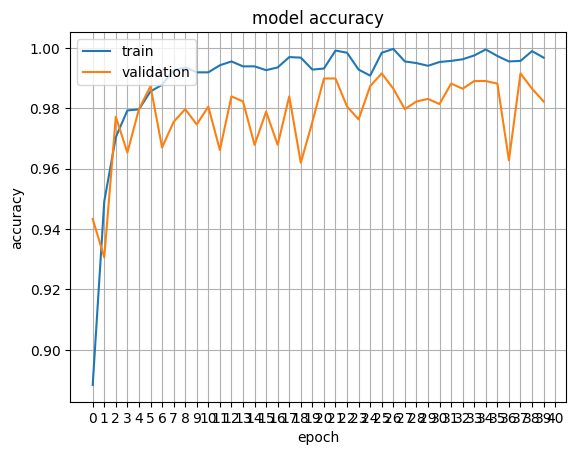

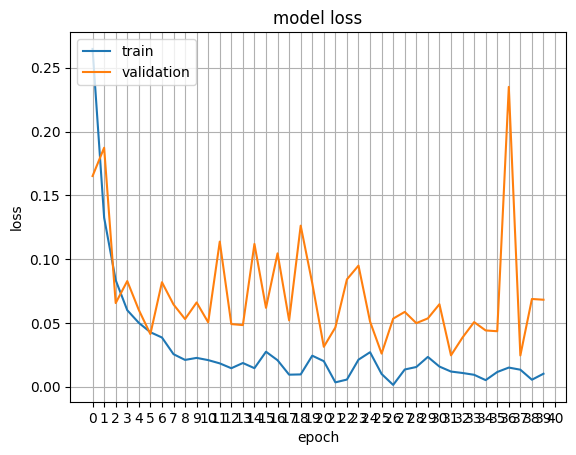

37/37 [==============================] - 7s 169ms/step - loss: 0.0259 - accuracy: 0.9915


In [21]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
import tensorflow_addons as tfa

from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv2bSbest.h5')
a=model1.evaluate(
    x=test_ds
)
a=model1.evaluate (
    x=val_ds
)


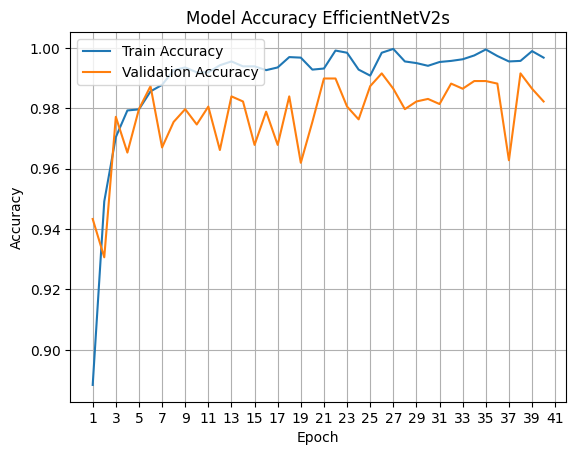

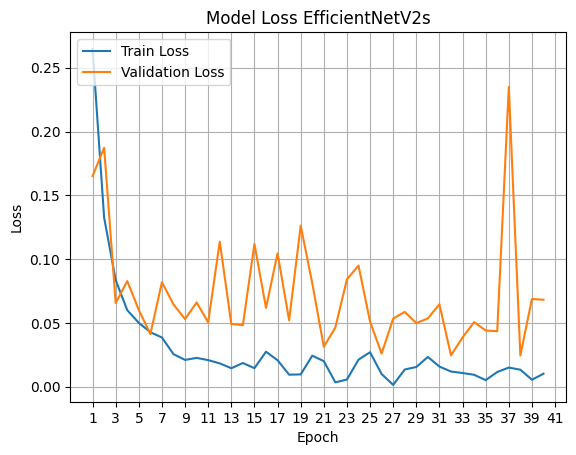

In [5]:
hist={'loss': [0.264741450548172, 0.13247457146644592, 0.0834667906165123, 0.059936150908470154, 0.05002394691109657, 0.04268583655357361, 0.03854324668645859, 0.0254630446434021, 0.020970918238162994, 0.022553367540240288, 0.020816035568714142, 0.01825694926083088, 0.014449145644903183, 0.018543358892202377, 0.01449905801564455, 0.02738357149064541, 0.02071586810052395, 0.009399832226336002, 0.009601105004549026, 0.024289093911647797, 0.01999579928815365, 0.0033788238652050495, 0.005567456595599651, 0.021160749718546867, 0.026997443288564682, 0.009925649501383305, 0.001366245560348034, 0.013456410728394985, 0.015415438450872898, 0.023312317207455635, 0.01576298289000988, 0.011846492998301983, 0.0107108810916543, 0.00931143295019865, 0.005121785216033459, 0.011486304923892021, 0.014968416653573513, 0.013295985758304596, 0.005437063053250313, 0.010142702609300613], 'accuracy': [0.8883678913116455, 0.9491433501243591, 0.9704238176345825, 0.9792606234550476, 0.9796212911605835, 0.9855725765228271, 0.987736701965332, 0.9926059246063232, 0.9935076832771301, 0.9918845891952515, 0.9918845891952515, 0.9942290186882019, 0.9954914450645447, 0.993868350982666, 0.993868350982666, 0.9926059246063232, 0.9935076832771301, 0.996934175491333, 0.9967538118362427, 0.9927862882614136, 0.9931469559669495, 0.9990983009338379, 0.9983769059181213, 0.9927862882614136, 0.990802526473999, 0.9983769059181213, 0.9996393322944641, 0.9954914450645447, 0.9949504137039185, 0.9940487146377563, 0.9953110814094543, 0.9956717491149902, 0.9962127804756165, 0.9974752068519592, 0.9994589686393738, 0.9972948431968689, 0.9954914450645447, 0.9956717491149902, 0.9989179372787476, 0.9967538118362427], 'val_loss': [0.16511021554470062, 0.18729327619075775, 0.06552865356206894, 0.082776740193367, 0.06012292578816414, 0.04120062664151192, 0.08186669647693634, 0.06443154066801071, 0.05298205092549324, 0.06601059436798096, 0.0504169836640358, 0.11369205266237259, 0.0490514412522316, 0.04826678708195686, 0.1118660569190979, 0.06177554279565811, 0.10451135039329529, 0.05198730528354645, 0.12618912756443024, 0.08114223182201385, 0.03126521036028862, 0.046428073197603226, 0.08411630243062973, 0.09489091485738754, 0.05102021247148514, 0.02592930942773819, 0.053336065262556076, 0.05860856920480728, 0.049792077392339706, 0.05351632088422775, 0.06460882723331451, 0.024553785100579262, 0.03855624422430992, 0.05060427635908127, 0.044065508991479874, 0.043446630239486694, 0.23498953878879547, 0.02446119673550129, 0.06873027235269547, 0.06814680248498917], 'val_accuracy': [0.9433164000511169, 0.9306260347366333, 0.9771573543548584, 0.9653130173683167, 0.9796954393386841, 0.9873096346855164, 0.9670050740242004, 0.9754652976989746, 0.9796954393386841, 0.9746192693710327, 0.980541467666626, 0.9661590456962585, 0.9839255213737488, 0.9822335243225098, 0.9678511023521423, 0.9788494110107422, 0.9678511023521423, 0.9839255213737488, 0.9619289636611938, 0.9754652976989746, 0.989847719669342, 0.989847719669342, 0.980541467666626, 0.9763113260269165, 0.9873096346855164, 0.9915397763252258, 0.9864636063575745, 0.9796954393386841, 0.9822335243225098, 0.9830795526504517, 0.9813874959945679, 0.9881556630134583, 0.9864636063575745, 0.9890016913414001, 0.9890016913414001, 0.9881556630134583, 0.962774932384491, 0.9915397763252258, 0.9864636063575745, 0.9822335243225098]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV2s')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV2s')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [1]:
histv2b0={'loss': [0.28907719254493713, 0.1613519936800003, 0.11069255322217941, 0.09671782702207565, 0.08252910524606705, 0.061810996383428574, 0.06766409426927567, 0.04907726123929024, 0.04679805412888527, 0.04051561653614044, 0.041470978409051895, 0.051388561725616455, 0.045350149273872375, 0.026032721623778343, 0.034838635474443436, 0.03341817483305931, 0.031031079590320587, 0.024739496409893036, 0.012492460198700428, 0.036294806748628616, 0.02374231442809105, 0.014509479515254498, 0.018699727952480316, 0.014864152297377586, 0.020207049325108528, 0.032619357109069824, 0.01784745790064335, 0.01885511539876461, 0.019373593851923943, 0.02443488873541355, 0.026569679379463196, 0.00570566626265645, 0.01692878268659115, 0.011904889717698097, 0.027286402881145477, 0.010506381280720234, 0.023140838369727135, 0.01105504296720028, 0.008603094145655632, 0.009309199638664722], 'accuracy': [0.8851217031478882, 0.9381424784660339, 0.9563570618629456, 0.9657348990440369, 0.9688007235527039, 0.9790802597999573, 0.9772768020629883, 0.9810640215873718, 0.9843102097511292, 0.9839494824409485, 0.9844905138015747, 0.9821460843086243, 0.984670877456665, 0.9913435578346252, 0.9882777333259583, 0.9888187646865845, 0.9897204637527466, 0.9913435578346252, 0.9958521127700806, 0.98899906873703, 0.9917042255401611, 0.9942290186882019, 0.9944093823432922, 0.9945897459983826, 0.9936879873275757, 0.9911631941795349, 0.9951307773590088, 0.9940487146377563, 0.993868350982666, 0.9931469559669495, 0.9918845891952515, 0.9981966018676758, 0.9949504137039185, 0.9971145391464233, 0.9897204637527466, 0.9958521127700806, 0.9931469559669495, 0.9949504137039185, 0.9972948431968689, 0.9967538118362427], 'val_loss': [0.15064410865306854, 0.13562706112861633, 0.09886860847473145, 0.158033087849617, 0.07452962547540665, 0.13336904346942902, 0.06531179696321487, 0.059418171644210815, 0.0962870717048645, 0.07514212280511856, 0.06912373006343842, 0.06252393126487732, 0.06385097652673721, 0.057563040405511856, 0.09010177850723267, 0.05075293034315109, 0.05729849636554718, 0.07190898060798645, 0.14843551814556122, 0.05949348956346512, 0.05000188946723938, 0.049089401960372925, 0.07686745375394821, 0.06071736663579941, 0.11377587169408798, 0.08765267580747604, 0.04549874737858772, 0.084908127784729, 0.05369943752884865, 0.0642719641327858, 0.05429999530315399, 0.05062229931354523, 0.037818774580955505, 0.04129163920879364, 0.05785194784402847, 0.05671590566635132, 0.05402512848377228, 0.06318459659814835, 0.07097741961479187, 0.16986501216888428], 'val_accuracy': [0.9450084567070007, 0.9500846266746521, 0.9644669890403748, 0.9348561763763428, 0.9712352156639099, 0.9543147087097168, 0.9763113260269165, 0.9822335243225098, 0.9695431590080261, 0.9780033826828003, 0.9788494110107422, 0.9830795526504517, 0.9788494110107422, 0.9813874959945679, 0.9661590456962585, 0.9847715497016907, 0.9839255213737488, 0.9763113260269165, 0.962774932384491, 0.980541467666626, 0.9856175780296326, 0.9839255213737488, 0.9873096346855164, 0.9813874959945679, 0.9695431590080261, 0.9686971306800842, 0.9822335243225098, 0.9771573543548584, 0.9864636063575745, 0.9856175780296326, 0.9822335243225098, 0.989847719669342, 0.9873096346855164, 0.9873096346855164, 0.9822335243225098, 0.9780033826828003, 0.9847715497016907, 0.9830795526504517, 0.9796954393386841, 0.9636209607124329]}
histv2b1={'loss': [0.29635530710220337, 0.15305036306381226, 0.11322780698537827, 0.09388142824172974, 0.07795872539281845, 0.059569746255874634, 0.06085900217294693, 0.04567766934633255, 0.03278152644634247, 0.05200105160474777, 0.03718965873122215, 0.03169030696153641, 0.037661872804164886, 0.04266315698623657, 0.022042782977223396, 0.020358193665742874, 0.025687765330076218, 0.021893274039030075, 0.020510690286755562, 0.03293731063604355, 0.021869411692023277, 0.021959971636533737, 0.019194666296243668, 0.011625006794929504, 0.01352368202060461, 0.011178025044500828, 0.017459269613027573, 0.023253807798027992, 0.01528230868279934, 0.01330495998263359, 0.014127499423921108, 0.014403329230844975, 0.009401013143360615, 0.013538825325667858, 0.013541062362492085, 0.016472170129418373, 0.020025944337248802, 0.01145081501454115, 0.022566767409443855, 0.01147319283336401], 'accuracy': [0.8748422265052795, 0.9430117011070251, 0.9556357264518738, 0.9669972658157349, 0.9709648489952087, 0.9769161343574524, 0.9767357707023621, 0.9839494824409485, 0.98899906873703, 0.9817854166030884, 0.9875563383102417, 0.9888187646865845, 0.985933244228363, 0.9855725765228271, 0.9920649528503418, 0.9933273196220398, 0.9915239214897156, 0.9927862882614136, 0.9933273196220398, 0.9906221628189087, 0.9935076832771301, 0.9918845891952515, 0.9936879873275757, 0.9965735077857971, 0.9951307773590088, 0.9963931441307068, 0.9933273196220398, 0.9926059246063232, 0.9945897459983826, 0.9954914450645447, 0.9958521127700806, 0.9953110814094543, 0.9978358745574951, 0.9953110814094543, 0.9963931441307068, 0.9942290186882019, 0.9935076832771301, 0.996934175491333, 0.9924256205558777, 0.9971145391464233], 'val_loss': [0.16697464883327484, 0.13115113973617554, 0.08481583744287491, 0.0771055743098259, 0.07519963383674622, 0.07500572502613068, 0.09625130146741867, 0.062202949076890945, 0.07008727639913559, 0.12675517797470093, 0.06676246225833893, 0.07181248813867569, 0.09228414297103882, 0.06439872086048126, 0.06644058972597122, 0.06907659024000168, 0.0703900009393692, 0.06644071638584137, 0.0640949085354805, 0.04269227758049965, 0.09893448650836945, 0.07918883860111237, 0.06183865666389465, 0.09944715350866318, 0.04876647889614105, 0.059812672436237335, 0.08920064568519592, 0.050645459443330765, 0.05088844895362854, 0.06752890348434448, 0.04369477927684784, 0.064399354159832, 0.06520934402942657, 0.06415145844221115, 0.07056301087141037, 0.04927587881684303, 0.09702328592538834, 0.0748288556933403, 0.12338491529226303, 0.050306495279073715], 'val_accuracy': [0.933164119720459, 0.9517766237258911, 0.9695431590080261, 0.9737732410430908, 0.9780033826828003, 0.9712352156639099, 0.9636209607124329, 0.9780033826828003, 0.9780033826828003, 0.962774932384491, 0.9830795526504517, 0.9754652976989746, 0.9712352156639099, 0.9754652976989746, 0.9839255213737488, 0.9830795526504517, 0.9796954393386841, 0.980541467666626, 0.980541467666626, 0.9873096346855164, 0.9754652976989746, 0.9754652976989746, 0.9847715497016907, 0.9780033826828003, 0.9881556630134583, 0.9788494110107422, 0.9813874959945679, 0.9864636063575745, 0.9864636063575745, 0.9839255213737488, 0.9873096346855164, 0.9847715497016907, 0.9856175780296326, 0.9839255213737488, 0.9813874959945679, 0.9856175780296326, 0.9737732410430908, 0.9788494110107422, 0.9585448503494263, 0.9864636063575745]}
histv2b2={'loss': [0.2725939452648163, 0.1564168781042099, 0.10502254962921143, 0.09061957150697708, 0.06932669132947922, 0.06309359520673752, 0.04596307873725891, 0.04330205172300339, 0.03809412568807602, 0.034285448491573334, 0.03936279937624931, 0.03266354277729988, 0.028814243152737617, 0.026989594101905823, 0.02576783299446106, 0.02325771376490593, 0.022772807627916336, 0.016105834394693375, 0.017233146354556084, 0.024609681218862534, 0.02937205694615841, 0.01690824143588543, 0.01476742047816515, 0.008877956308424473, 0.013116572983562946, 0.011789925396442413, 0.01699492707848549, 0.031394146382808685, 0.01930280774831772, 0.015945198014378548, 0.018290184438228607, 0.013025961816310883, 0.013344969600439072, 0.014499806798994541, 0.01682198792695999, 0.014417996630072594, 0.012495544739067554, 0.017345920205116272, 0.01806374453008175, 0.01874062791466713], 'accuracy': [0.8907123804092407, 0.9372407793998718, 0.9617673754692078, 0.9677186608314514, 0.9743913412094116, 0.9794409275054932, 0.9826871156692505, 0.9841298460960388, 0.9843102097511292, 0.9880973696708679, 0.9866546392440796, 0.9893597960472107, 0.9900811314582825, 0.9911631941795349, 0.9922452569007874, 0.9920649528503418, 0.9933273196220398, 0.9949504137039185, 0.9927862882614136, 0.9909828901290894, 0.9895401000976562, 0.9931469559669495, 0.9956717491149902, 0.9976555705070496, 0.9972948431968689, 0.9963931441307068, 0.9944093823432922, 0.990802526473999, 0.9933273196220398, 0.9933273196220398, 0.9944093823432922, 0.9965735077857971, 0.9949504137039185, 0.9954914450645447, 0.9954914450645447, 0.9953110814094543, 0.9962127804756165, 0.9953110814094543, 0.9931469559669495, 0.9945897459983826], 'val_loss': [0.21789449453353882, 0.10614040493965149, 0.15434980392456055, 0.08925174921751022, 0.09592849761247635, 0.06675440818071365, 0.07560352236032486, 0.09463305026292801, 0.07383204251527786, 0.08207449316978455, 0.08208447694778442, 0.13392764329910278, 0.08342450112104416, 0.07322417944669724, 0.09368299692869186, 0.09211566299200058, 0.08597743511199951, 0.06784938275814056, 0.1522863209247589, 0.09953046590089798, 0.05480474978685379, 0.08927413076162338, 0.040995728224515915, 0.09029549360275269, 0.3373202383518219, 0.0958477333188057, 0.09800896793603897, 0.08819354325532913, 0.03773411735892296, 0.05662327632308006, 0.07744408398866653, 0.0720193162560463, 0.10879437625408173, 0.06795968860387802, 0.0667358860373497, 0.07326872646808624, 0.08145412057638168, 0.09065227210521698, 0.060535676777362823, 0.07285048812627792], 'val_accuracy': [0.9052453637123108, 0.9568527936935425, 0.9390863180160522, 0.9644669890403748, 0.962774932384491, 0.9771573543548584, 0.9729272127151489, 0.9763113260269165, 0.9788494110107422, 0.9754652976989746, 0.9686971306800842, 0.9576988220214844, 0.9780033826828003, 0.9822335243225098, 0.9678511023521423, 0.9729272127151489, 0.970389187335968, 0.980541467666626, 0.962774932384491, 0.9729272127151489, 0.9839255213737488, 0.9754652976989746, 0.9873096346855164, 0.9830795526504517, 0.9179357290267944, 0.980541467666626, 0.9780033826828003, 0.9771573543548584, 0.989847719669342, 0.9822335243225098, 0.9830795526504517, 0.9813874959945679, 0.9746192693710327, 0.9796954393386841, 0.9771573543548584, 0.9796954393386841, 0.9856175780296326, 0.9771573543548584, 0.9847715497016907, 0.9873096346855164]}
histv2b3={'loss': [0.2896578311920166, 0.1309700310230255, 0.0907747894525528, 0.07920201122760773, 0.04943930357694626, 0.049934837967157364, 0.04043332487344742, 0.03943122178316116, 0.042241696268320084, 0.017250964418053627, 0.020969798788428307, 0.03192667290568352, 0.028190530836582184, 0.02173665165901184, 0.008604740723967552, 0.01778346672654152, 0.01992565393447876, 0.019320828840136528, 0.017099611461162567, 0.01468881219625473, 0.011325730010867119, 0.013227557763457298, 0.014374745078384876, 0.013820908963680267, 0.001336442306637764, 0.012369358912110329, 0.022280234843492508, 0.007983892224729061, 0.011833317577838898, 0.02361212484538555, 0.021154860034585, 0.010999448597431183, 0.005844454746693373, 0.019913464784622192, 0.007056755945086479, 0.013720652088522911, 0.013400889001786709, 0.009432833641767502, 0.0042434982024133205, 0.01570555940270424], 'accuracy': [0.8793507814407349, 0.9505861401557922, 0.9657348990440369, 0.9693417549133301, 0.9841298460960388, 0.9805229902267456, 0.9864742755889893, 0.9873760342597961, 0.9841298460960388, 0.993868350982666, 0.9933273196220398, 0.9900811314582825, 0.9917042255401611, 0.9933273196220398, 0.9978358745574951, 0.9956717491149902, 0.9924256205558777, 0.9949504137039185, 0.9942290186882019, 0.9947700500488281, 0.9967538118362427, 0.9962127804756165, 0.9954914450645447, 0.9956717491149902, 0.9994589686393738, 0.9956717491149902, 0.9935076832771301, 0.9974752068519592, 0.9962127804756165, 0.9942290186882019, 0.9945897459983826, 0.9965735077857971, 0.9980162382125854, 0.9944093823432922, 0.9978358745574951, 0.9962127804756165, 0.9965735077857971, 0.9965735077857971, 0.9983769059181213, 0.9956717491149902], 'val_loss': [0.16840432584285736, 0.16296860575675964, 0.0986735001206398, 0.07924855500459671, 0.10632046312093735, 0.08993938565254211, 0.06357746571302414, 0.08295421302318573, 0.08844739943742752, 0.056755974888801575, 0.1116754487156868, 0.1033993735909462, 0.06923864781856537, 0.042380139231681824, 0.0802299901843071, 0.06825248152017593, 0.08809307217597961, 0.11015117168426514, 0.052617453038692474, 0.05066841468214989, 0.024212360382080078, 0.068710558116436, 0.04537561908364296, 0.051655255258083344, 0.059630386531353, 0.05329396203160286, 0.0640355721116066, 0.05421053245663643, 0.05116533860564232, 0.09522628784179688, 0.03845978155732155, 0.12750659883022308, 0.1097617894411087, 0.048196759074926376, 0.06042258441448212, 0.05449399724602699, 0.0348912850022316, 0.04801350459456444, 0.10763975977897644, 0.050293464213609695], 'val_accuracy': [0.9357022047042847, 0.9382402896881104, 0.9644669890403748, 0.9712352156639099, 0.9678511023521423, 0.9661590456962585, 0.9720812439918518, 0.970389187335968, 0.9754652976989746, 0.9813874959945679, 0.9780033826828003, 0.9754652976989746, 0.9813874959945679, 0.9890016913414001, 0.9847715497016907, 0.9822335243225098, 0.980541467666626, 0.9771573543548584, 0.9856175780296326, 0.980541467666626, 0.9923858046531677, 0.9822335243225098, 0.9873096346855164, 0.9864636063575745, 0.9856175780296326, 0.9796954393386841, 0.9847715497016907, 0.9856175780296326, 0.9890016913414001, 0.9729272127151489, 0.9890016913414001, 0.9737732410430908, 0.9839255213737488, 0.9847715497016907, 0.9856175780296326, 0.9864636063575745, 0.9906937479972839, 0.9864636063575745, 0.9839255213737488, 0.9864636063575745]}
histv2s={'loss': [0.264741450548172, 0.13247457146644592, 0.0834667906165123, 0.059936150908470154, 0.05002394691109657, 0.04268583655357361, 0.03854324668645859, 0.0254630446434021, 0.020970918238162994, 0.022553367540240288, 0.020816035568714142, 0.01825694926083088, 0.014449145644903183, 0.018543358892202377, 0.01449905801564455, 0.02738357149064541, 0.02071586810052395, 0.009399832226336002, 0.009601105004549026, 0.024289093911647797, 0.01999579928815365, 0.0033788238652050495, 0.005567456595599651, 0.021160749718546867, 0.026997443288564682, 0.009925649501383305, 0.001366245560348034, 0.013456410728394985, 0.015415438450872898, 0.023312317207455635, 0.01576298289000988, 0.011846492998301983, 0.0107108810916543, 0.00931143295019865, 0.005121785216033459, 0.011486304923892021, 0.014968416653573513, 0.013295985758304596, 0.005437063053250313, 0.010142702609300613], 'accuracy': [0.8883678913116455, 0.9491433501243591, 0.9704238176345825, 0.9792606234550476, 0.9796212911605835, 0.9855725765228271, 0.987736701965332, 0.9926059246063232, 0.9935076832771301, 0.9918845891952515, 0.9918845891952515, 0.9942290186882019, 0.9954914450645447, 0.993868350982666, 0.993868350982666, 0.9926059246063232, 0.9935076832771301, 0.996934175491333, 0.9967538118362427, 0.9927862882614136, 0.9931469559669495, 0.9990983009338379, 0.9983769059181213, 0.9927862882614136, 0.990802526473999, 0.9983769059181213, 0.9996393322944641, 0.9954914450645447, 0.9949504137039185, 0.9940487146377563, 0.9953110814094543, 0.9956717491149902, 0.9962127804756165, 0.9974752068519592, 0.9994589686393738, 0.9972948431968689, 0.9954914450645447, 0.9956717491149902, 0.9989179372787476, 0.9967538118362427], 'val_loss': [0.16511021554470062, 0.18729327619075775, 0.06552865356206894, 0.082776740193367, 0.06012292578816414, 0.04120062664151192, 0.08186669647693634, 0.06443154066801071, 0.05298205092549324, 0.06601059436798096, 0.0504169836640358, 0.11369205266237259, 0.0490514412522316, 0.04826678708195686, 0.1118660569190979, 0.06177554279565811, 0.10451135039329529, 0.05198730528354645, 0.12618912756443024, 0.08114223182201385, 0.03126521036028862, 0.046428073197603226, 0.08411630243062973, 0.09489091485738754, 0.05102021247148514, 0.02592930942773819, 0.053336065262556076, 0.05860856920480728, 0.049792077392339706, 0.05351632088422775, 0.06460882723331451, 0.024553785100579262, 0.03855624422430992, 0.05060427635908127, 0.044065508991479874, 0.043446630239486694, 0.23498953878879547, 0.02446119673550129, 0.06873027235269547, 0.06814680248498917], 'val_accuracy': [0.9433164000511169, 0.9306260347366333, 0.9771573543548584, 0.9653130173683167, 0.9796954393386841, 0.9873096346855164, 0.9670050740242004, 0.9754652976989746, 0.9796954393386841, 0.9746192693710327, 0.980541467666626, 0.9661590456962585, 0.9839255213737488, 0.9822335243225098, 0.9678511023521423, 0.9788494110107422, 0.9678511023521423, 0.9839255213737488, 0.9619289636611938, 0.9754652976989746, 0.989847719669342, 0.989847719669342, 0.980541467666626, 0.9763113260269165, 0.9873096346855164, 0.9915397763252258, 0.9864636063575745, 0.9796954393386841, 0.9822335243225098, 0.9830795526504517, 0.9813874959945679, 0.9881556630134583, 0.9864636063575745, 0.9890016913414001, 0.9890016913414001, 0.9881556630134583, 0.962774932384491, 0.9915397763252258, 0.9864636063575745, 0.9822335243225098]}


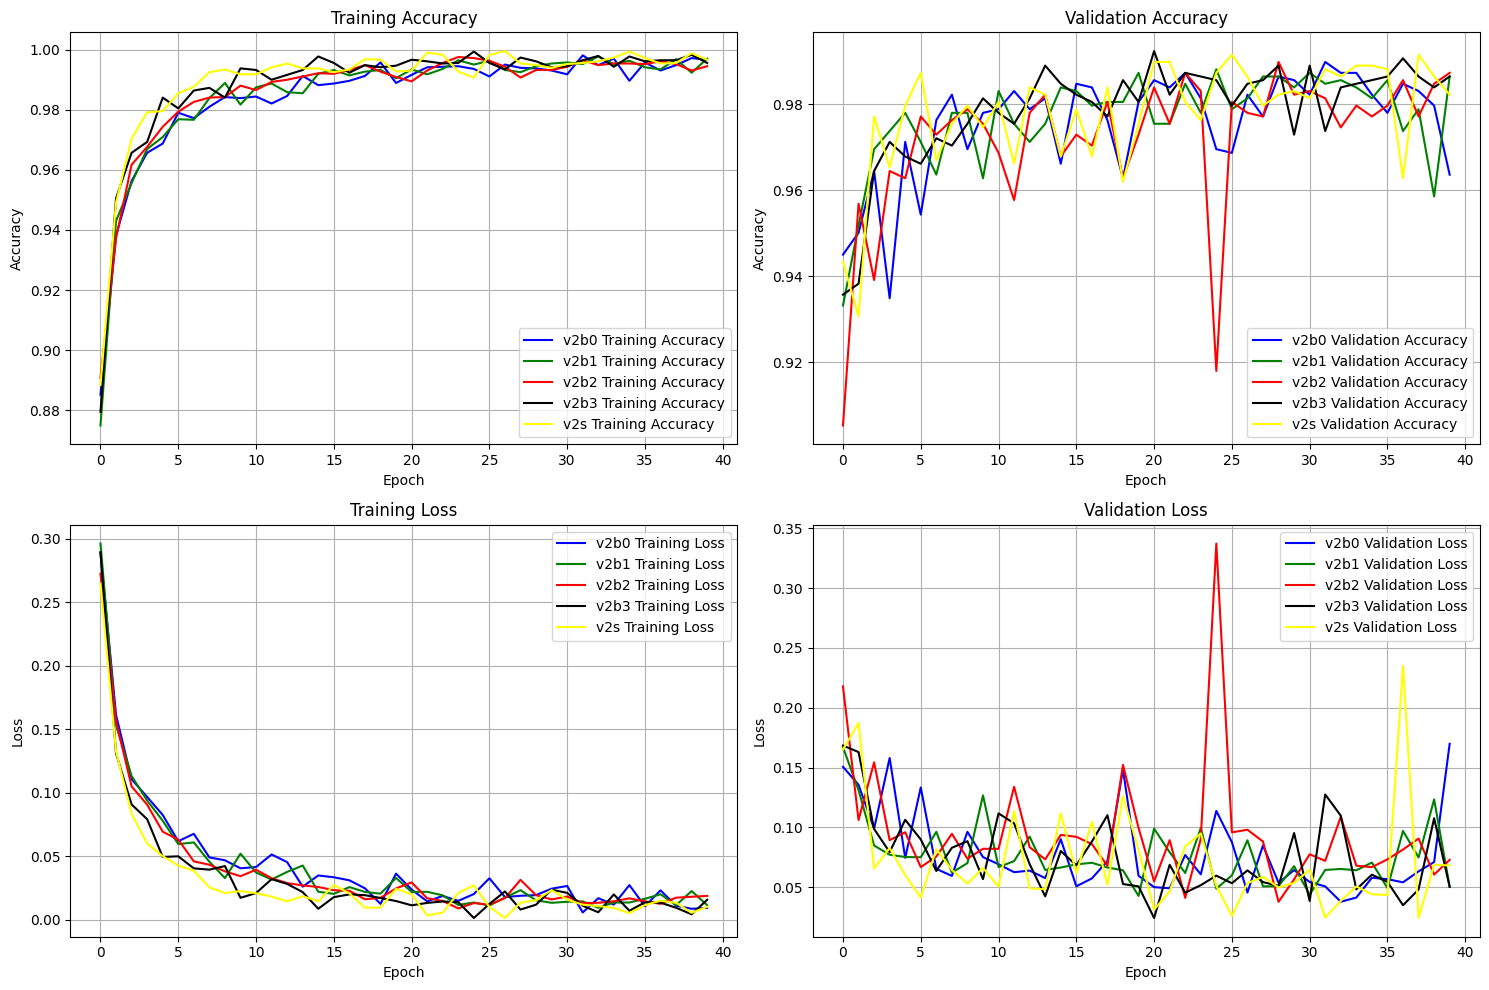

In [2]:
import matplotlib.pyplot as plt
histories = [histv2b0, histv2b1, histv2b2, histv2b3, histv2s]
network_names = ['v2b0', 'v2b1', 'v2b2', 'v2b3', 'v2s']
colors = ['b', 'g', 'r', 'black', 'yellow'] 


plt.figure(figsize=(15, 10)) 

plt.subplot(2, 2, 1)
for i, hist in enumerate(histories):
    
    plt.plot(hist['accuracy'], label=f'{network_names[i]} Training Accuracy', color=colors[i], linestyle='-')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
for i, hist in enumerate(histories):
    plt.plot(hist['val_accuracy'], label=f'{network_names[i]} Validation Accuracy', color=colors[i], linestyle='-')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
for i, hist in enumerate(histories):
    plt.plot(hist['loss'], label=f'{network_names[i]} Training Loss', color=colors[i], linestyle='-')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
for i, hist in enumerate(histories):
    plt.plot(hist['val_loss'], label=f'{network_names[i]} Validation Loss', color=colors[i], linestyle='-')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout() 
plt.show()